In [1]:
import numpy as np
import random
import pandas as pd
from format_data import *
from preprocess import *
from plots import *
from utils import *

In [2]:
np.random.seed(100)
random.seed(100)

In [3]:
Db=create_dataframe()

target = OutputColumn.yield_strength

Db = preprocess_supervised(Db, target)
X, y = split_target_from_dataset(Db)


We retain only the rows with output values Yield strength / MPa, that is 47.215496% of the dataset


# Supervised: output yield_strength

## 1. Preprocessing

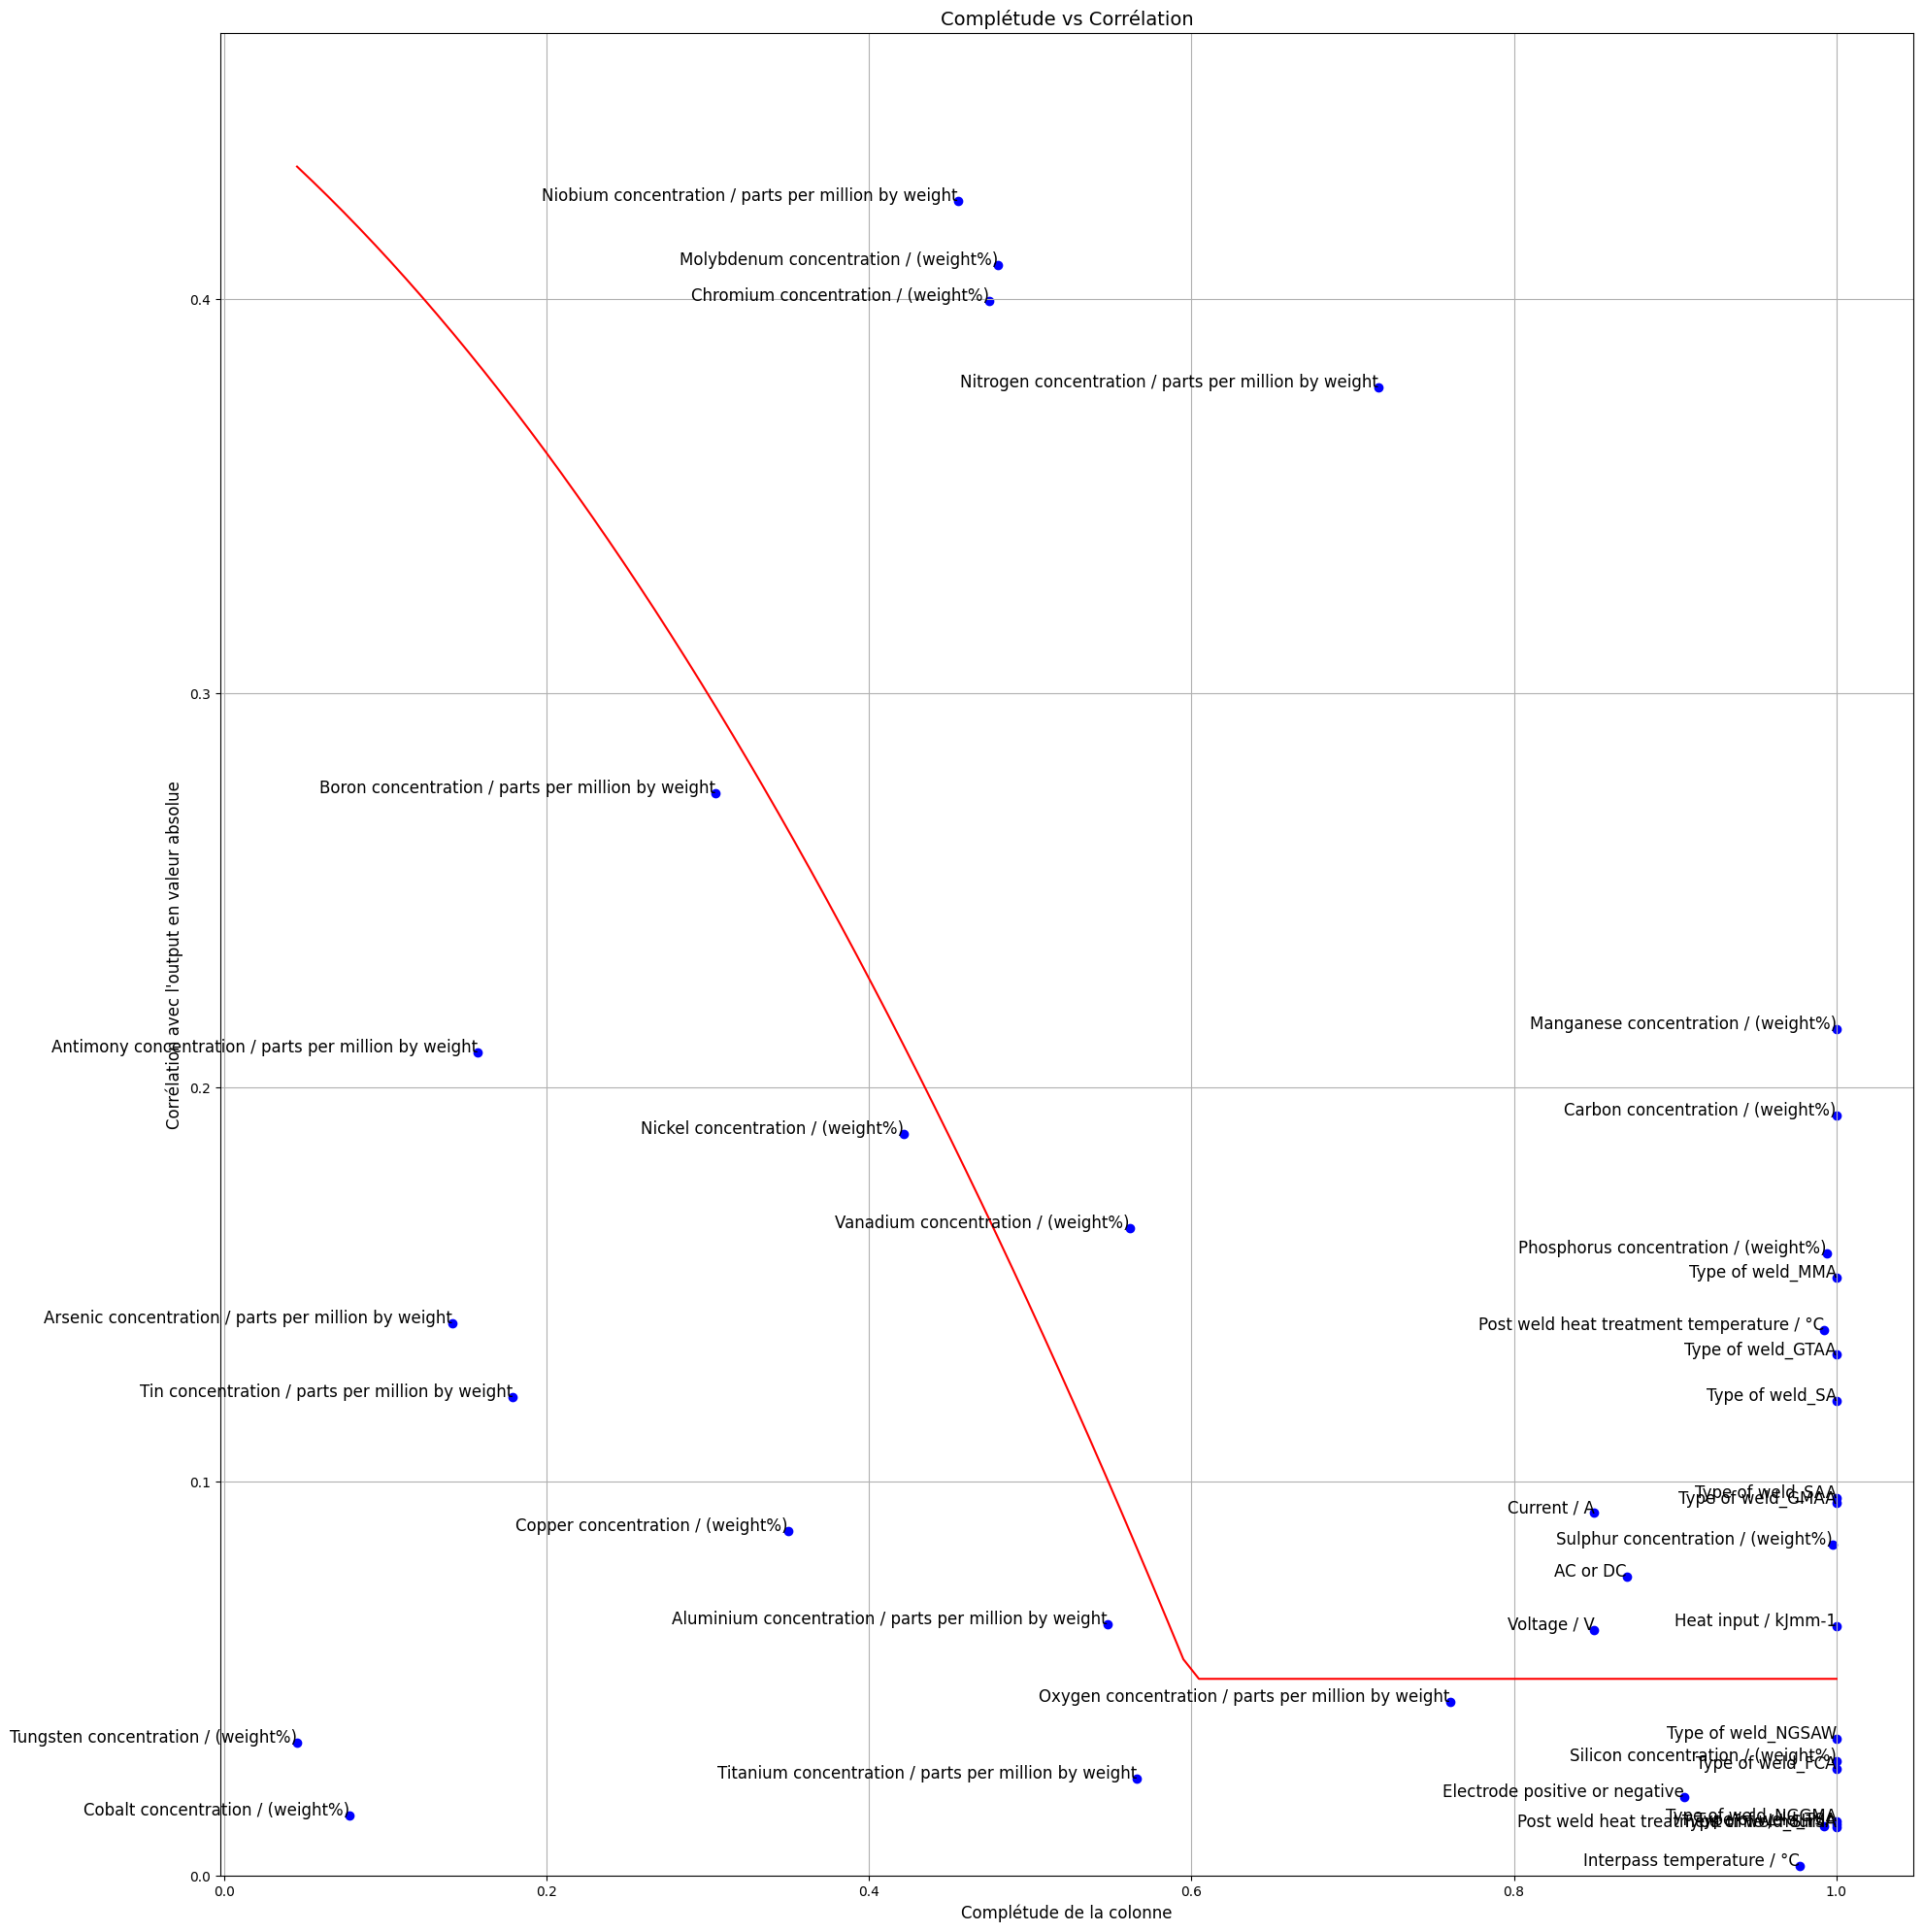

In [4]:
plot_completeness_vs_corr(Db, OutputColumn.yield_strength, feature_decision=feature_decision)

## 2. Regressions

Evaluate Linear Regression
Performing Evaluation with Cross-Validation


  0%|          | 0/19 [00:00<?, ?it/s]

100%|██████████| 19/19 [04:59<00:00, 15.74s/it]


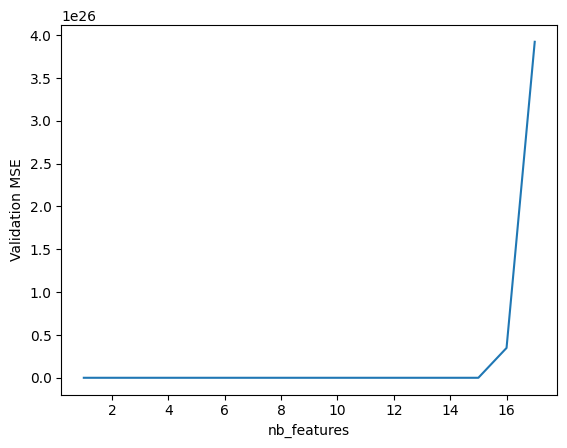

Best features:  ['Molybdenum concentration / (weight%)', 'Manganese concentration / (weight%)', 'Type of weld_SA', 'Nickel concentration / (weight%)', 'Type of weld_GTAA', 'AC or DC']


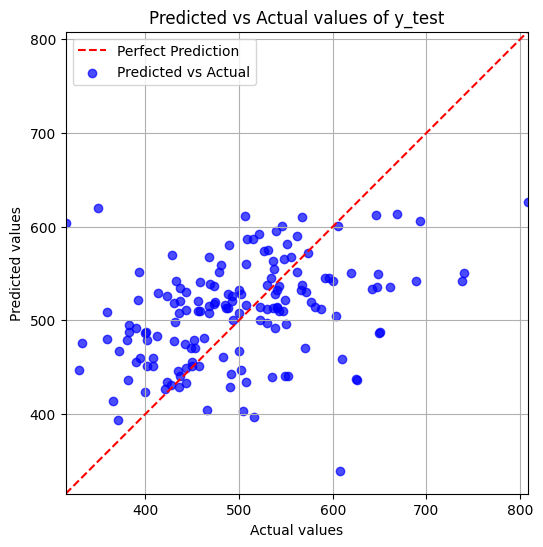

{'MSE': 6691.227544066236, 'R²': 0.22892420987166054, 'Bias': -1.6465724887736397, 'Variance': 3113.1033041766786}
Search best degree


100%|██████████| 19/19 [25:30<00:00, 80.56s/it] 


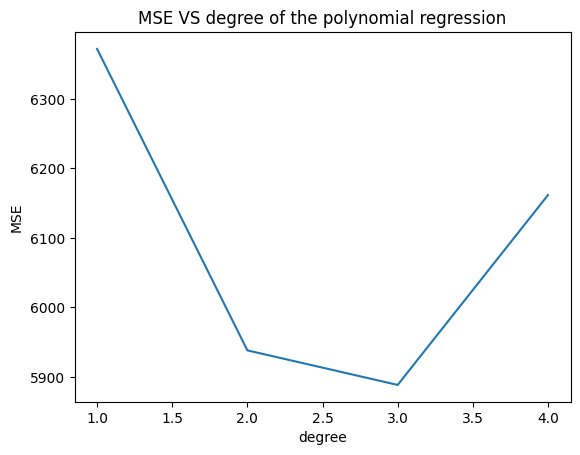

Evaluate Polynomial Regression with degree  3
Performing Evaluation with Cross-Validation


100%|██████████| 19/19 [09:56<00:00, 31.37s/it]


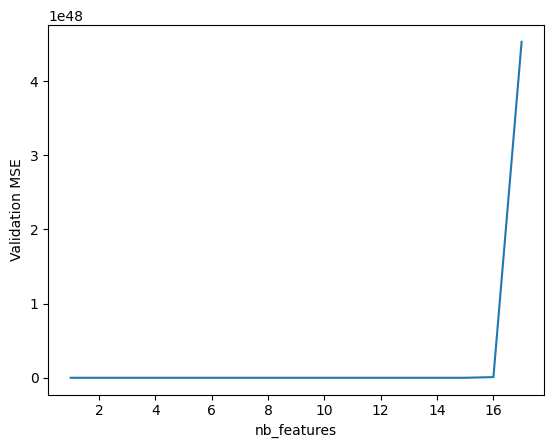

Best features:  ['Molybdenum concentration / (weight%)', 'Type of weld_GTAA', 'Type of weld_SA', 'Type of weld_GMAA', 'Manganese concentration / (weight%)', 'Type of weld_SAA', 'AC or DC']


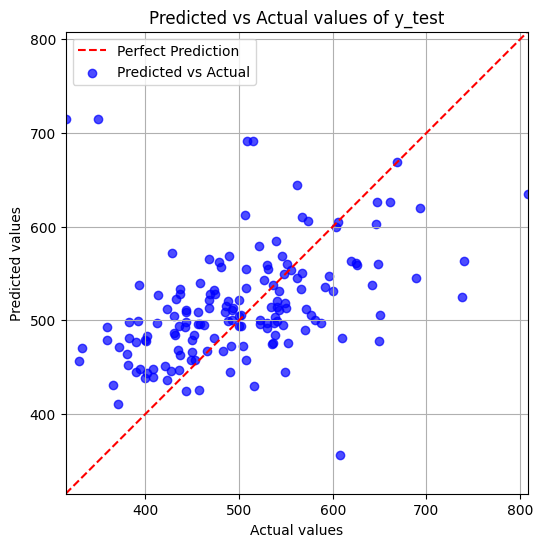

{'MSE': 6220.85700139537, 'R²': 0.2854423755687483, 'Bias': 0.42202853106000654, 'Variance': 3123.5347349290387}


In [6]:
from models.regressions import evaluate_linear_regression, evaluate_polynomial_regression

evaluate_linear_regression(X,y)
evaluate_polynomial_regression(X,y)

## 3. Random Forest

Selecting best Random Forest hyper-parameters
Choose parameters: {'n_estimators': np.int64(150), 'max_depth': np.int64(30), 'max_features': 7}


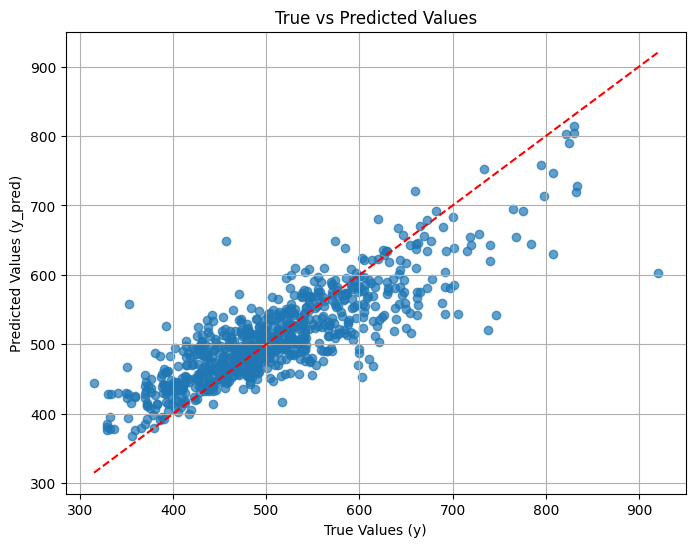

Evaluation results:
{'MSE (OOB)': np.float64(2587.353827172935), 'R² (OOB)': 0.6995967201035374, 'Bias (OOB)': np.float64(0.3394769966217052), 'Variance (OOB)': np.float64(4433.477463429322)}
Model saved as: models/pickels/random_forest.pkl


In [4]:
from models.randomforests import complete_pipeline

rf_model = complete_pipeline(X, y)

## 4. Gradient Boosting

Selecting best xgboost_supervised model
Best parameters for xgboost_supervised: {'model__alpha': 0.1, 'model__eta': 0.1, 'model__max_depth': 3, 'model__n_estimators': 700}


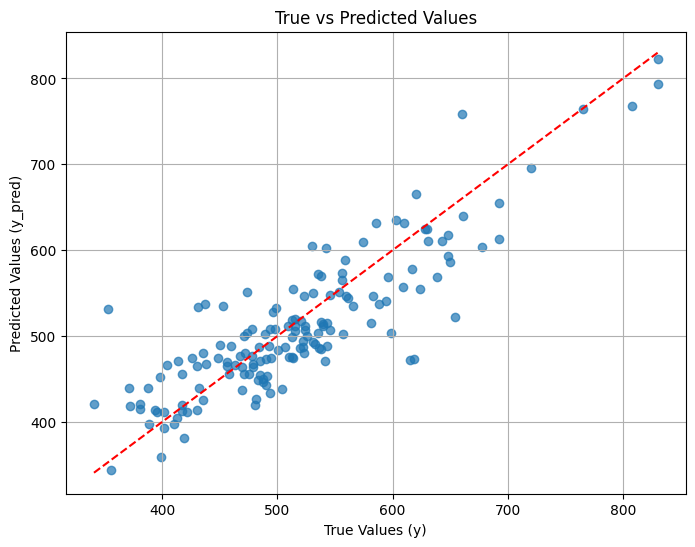

Evaluation results:
{'MSE': np.float64(2126.7708372834286), 'R²': 0.7447362478510844, 'Bias': np.float64(-6.299738409580328), 'Variance': np.float32(6646.6436)}


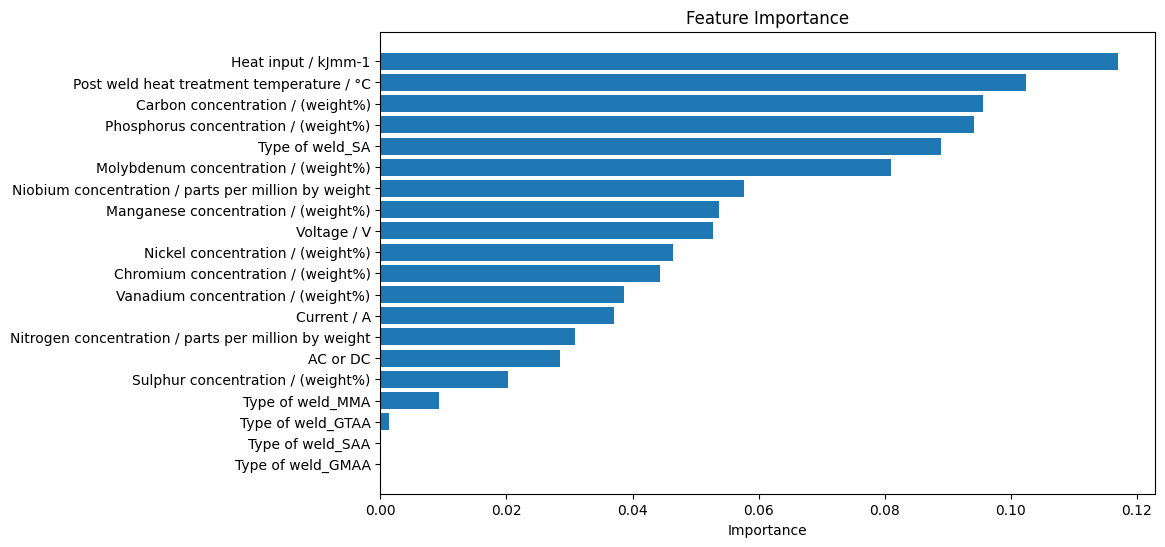

Model saved as: models/pickels/xgboost_supervised.pkl


In [6]:
from models.boosting_techniques import complete_pipeline, XGBoostConfigSupervised
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
complete_pipeline(X_train, X_test, y_train, y_test, XGBoostConfigSupervised())

# PCA

In [7]:
from dataset_analysis.PCA import *
pca_datset=preprocess_PCA(Db)
pca_datset.describe()

Current / A  Titanium concentration / parts per million by weight  \
count  1652.000000                                        1652.000000      
mean     -0.029585                                          -0.120817      
std       0.957534                                           1.131994      
min      -2.086471                                          -6.128018      
25%      -0.591419                                          -0.725910      
50%      -0.591419                                          -0.377117      
75%       0.086045                                           0.433312      
max       3.200939                                           6.280714      

       Molybdenum concentration / (weight%)  \
count                           1652.000000   
mean                              -0.375489   
std                                0.973915   
min                               -3.121141   
25%                               -1.004291   
50%                               -0.627022   
75%                                0.259603   
max                                2.610832   

       Niobium concentration / parts per million by weight  \
count                                        1652.000000     
mean                                           -0.054825     
std                                             0.891476     
min                                            -2.528856     
25%                                            -0.569669     
50%                                            -0.336198     
75%                                             0.294754     
max                                             3.783874     

       Interpass temperature / °C  \
count                 1652.000000   
mean                    -0.013028   
std                      1.003936   
min                     -4.676541   
25%                     -0.123999   
50%                     -0.123999   
75%                     -0.123999   
max                      2.405191   

       Tin concentration / parts per million by weight  \
count                                      1652.000000   
mean                                         -0.179792   
std                                           1.135844   
min                                          -5.345743   
25%                                          -0.469499   
50%                                           0.029533   
75%                                           0.394568   
max                                          10.795715   

       Carbon concentration / (weight%)  \
count                      1.652000e+03   
mean                       4.129062e-16   
std                        1.000303e+00   
min                       -1.947250e+00   
25%                       -5.764332e-01   
50%                       -6.368496e-02   
75%                        4.385990e-01   
max                        4.373157e+00   

       Antimony concentration / parts per million by weight  \
count                                        1652.000000      
mean                                           -0.027640      
std                                             1.322157      
min                                            -4.144604      
25%                                            -0.801849      
50%                                            -0.298115      
75%                                             0.613573      
max                                             5.952195      

       Nitrogen concentration / parts per million by weight  \
count                                        1652.000000      
mean                                           -0.019955      
std                                             0.956439      
min                                            -2.259629      
25%                                            -0.473374      
50%                                            -0.296036      
75%                                             0.071679      
max                   

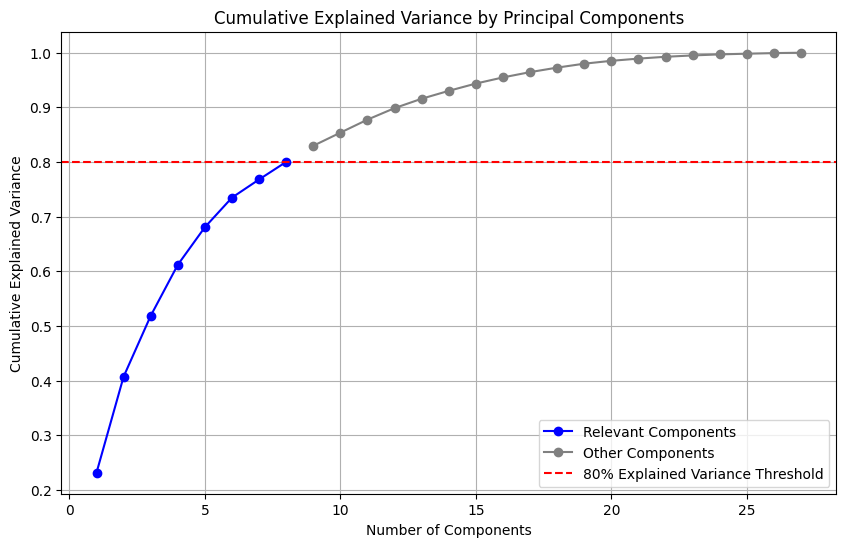

In [8]:
pca, principal_components, nb_relevant_features = run_PCA(pca_datset)
plot_explained_variance_pca(pca, nb_relevant_features)

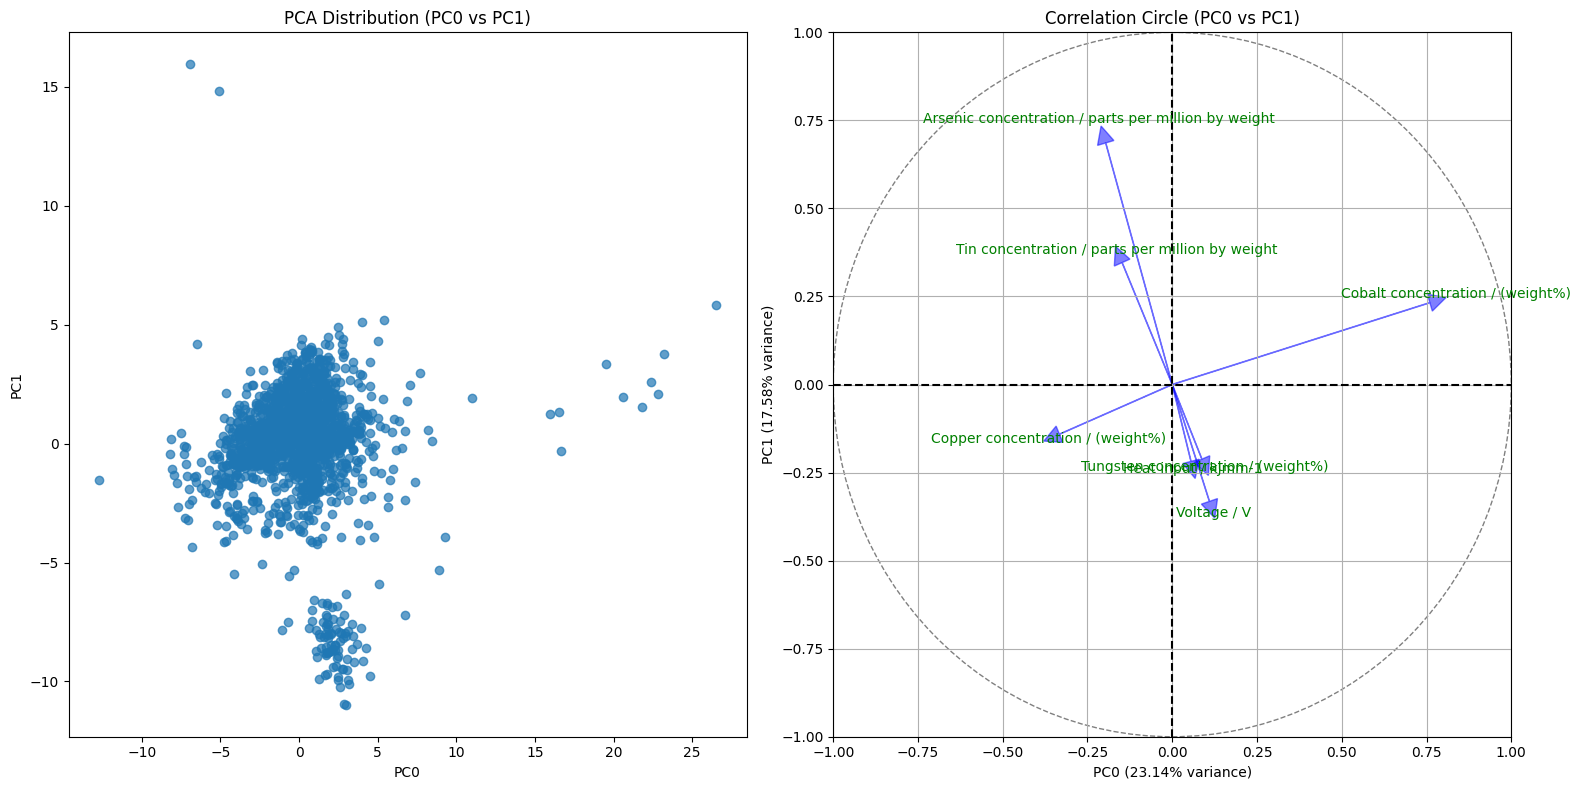

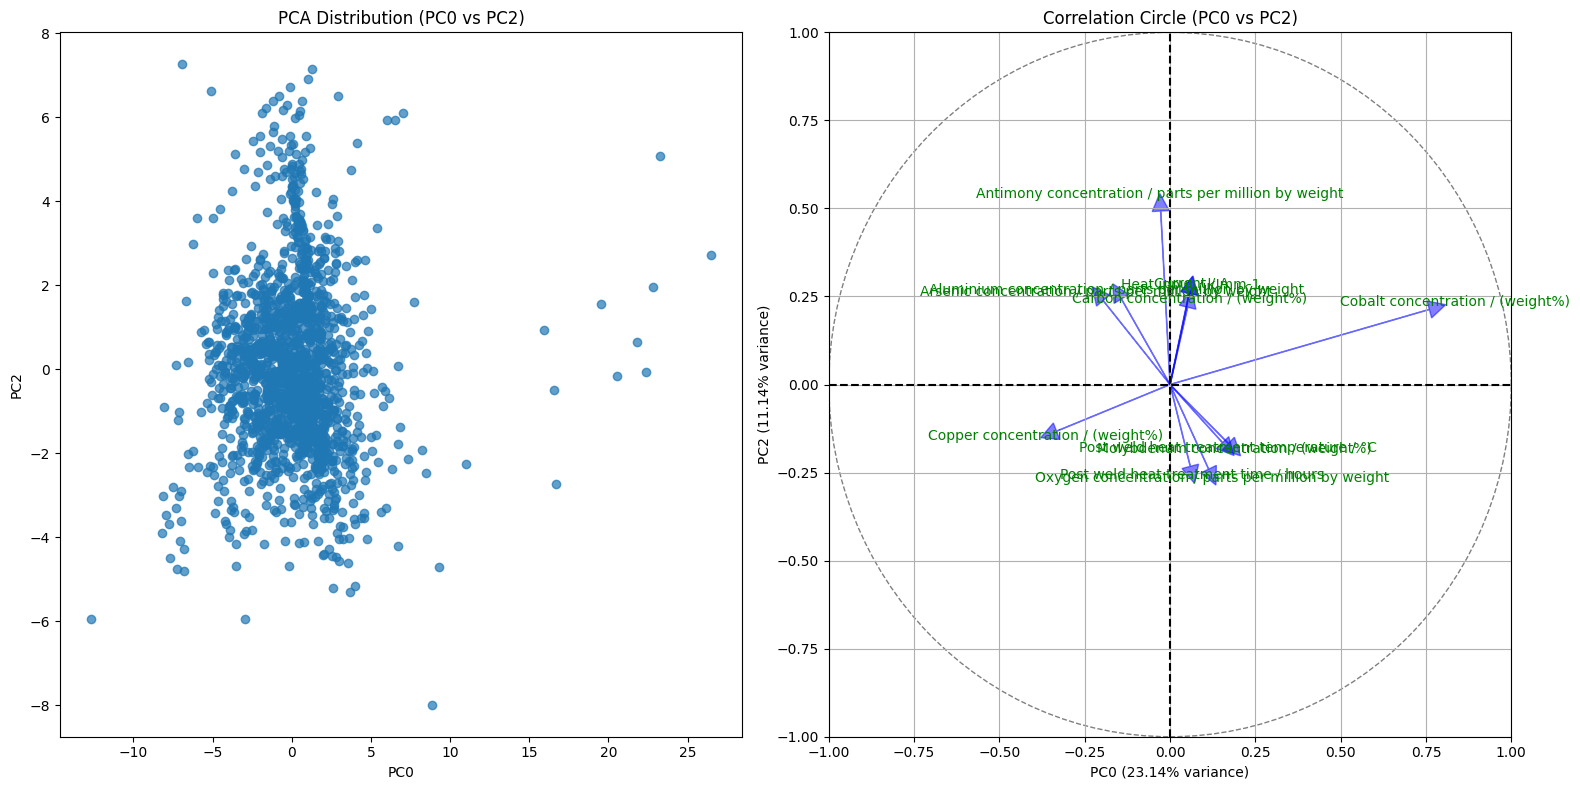

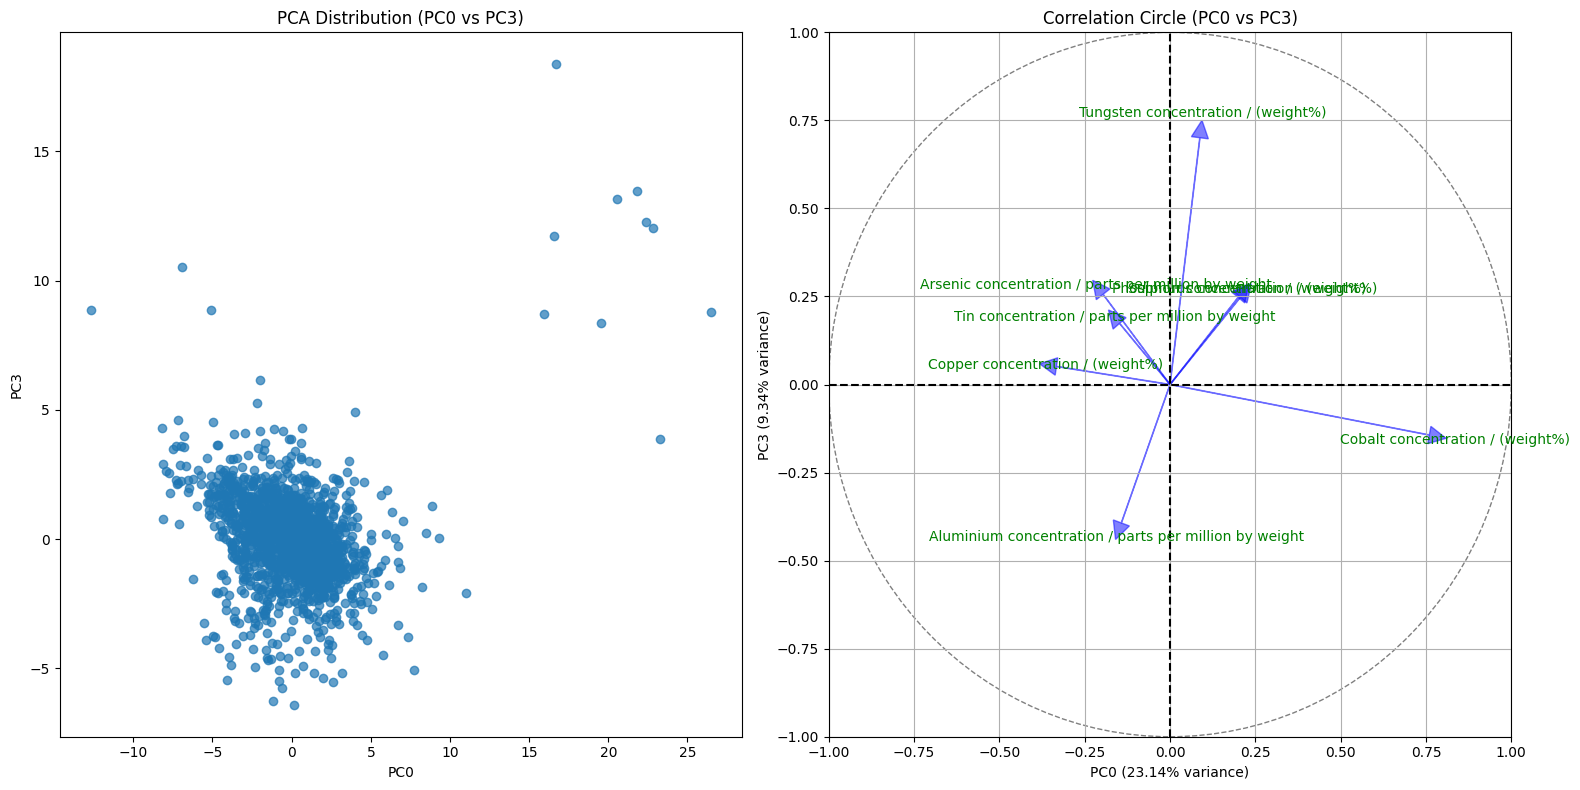

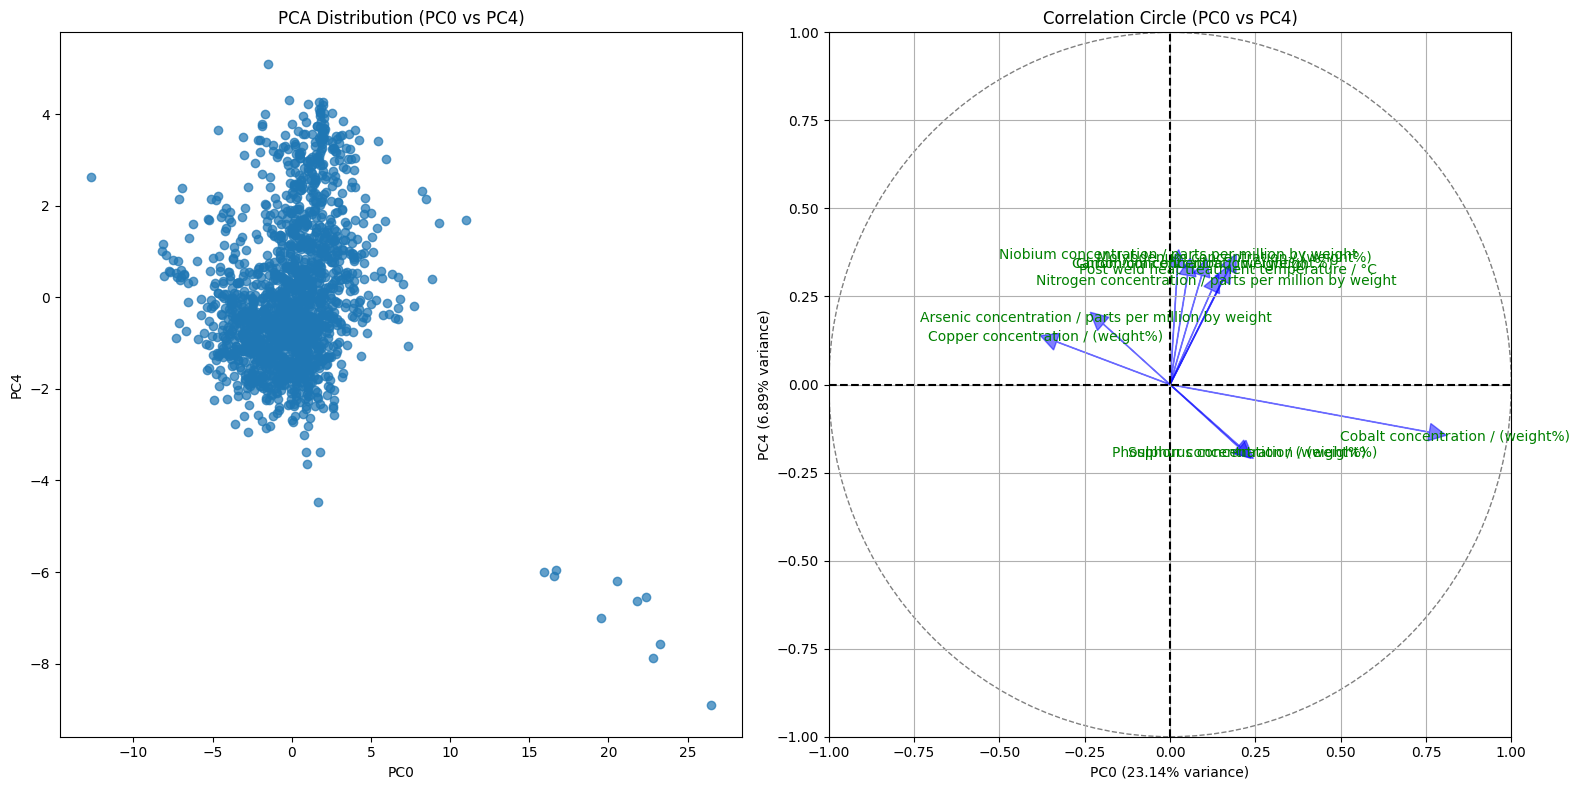

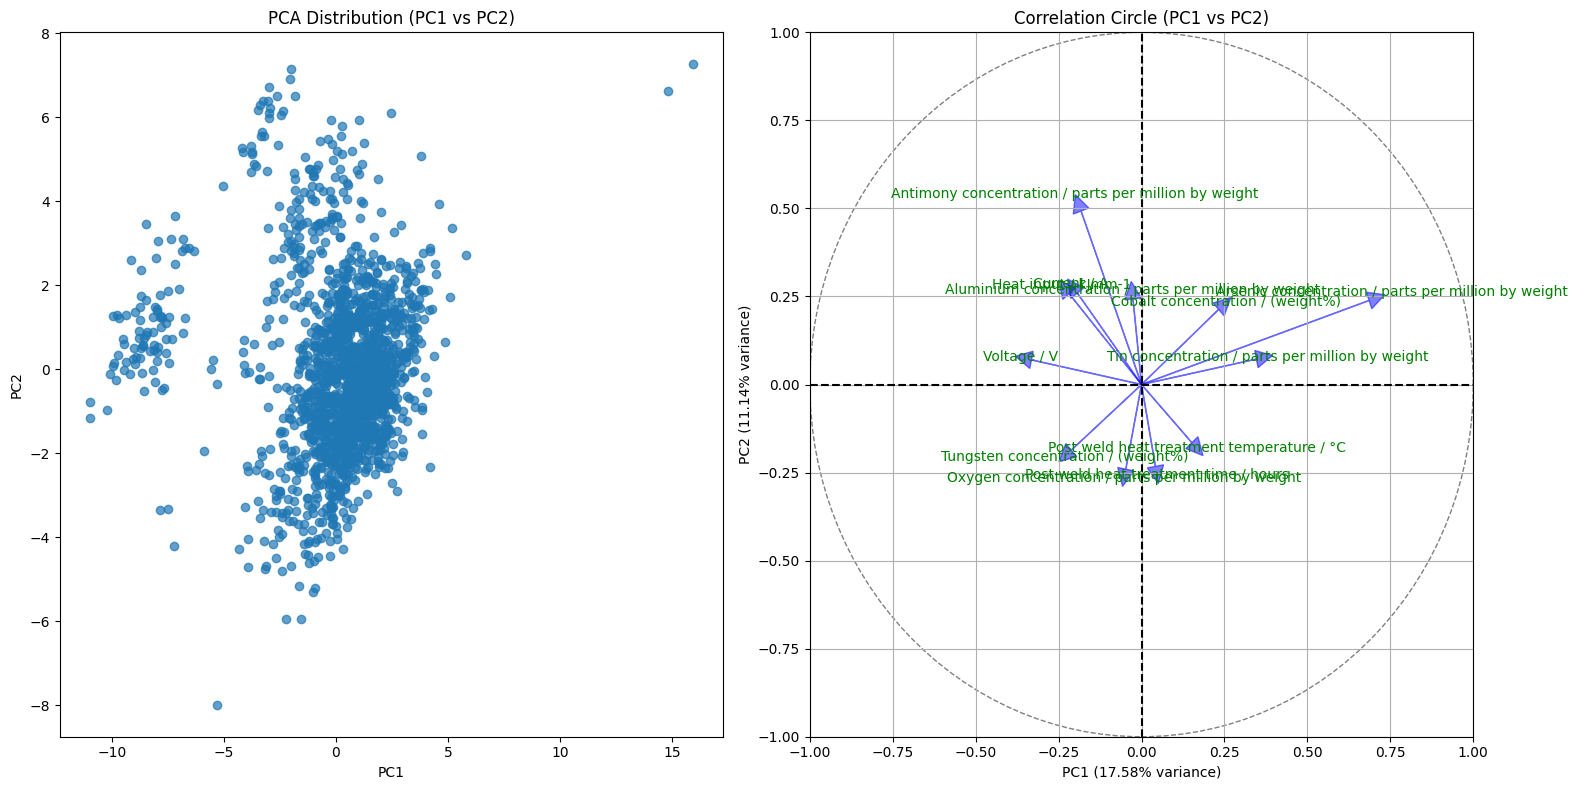

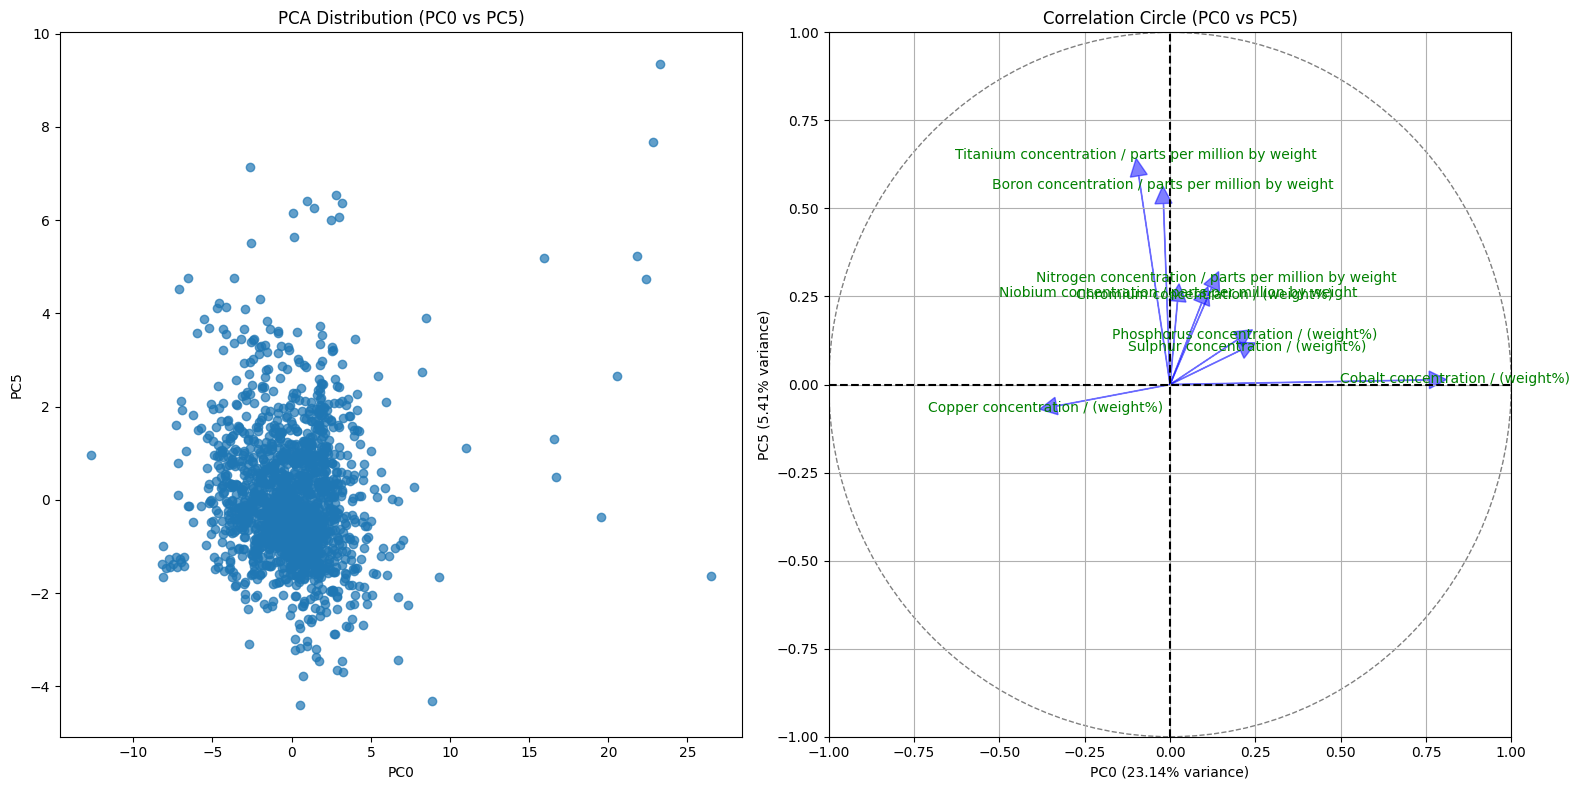

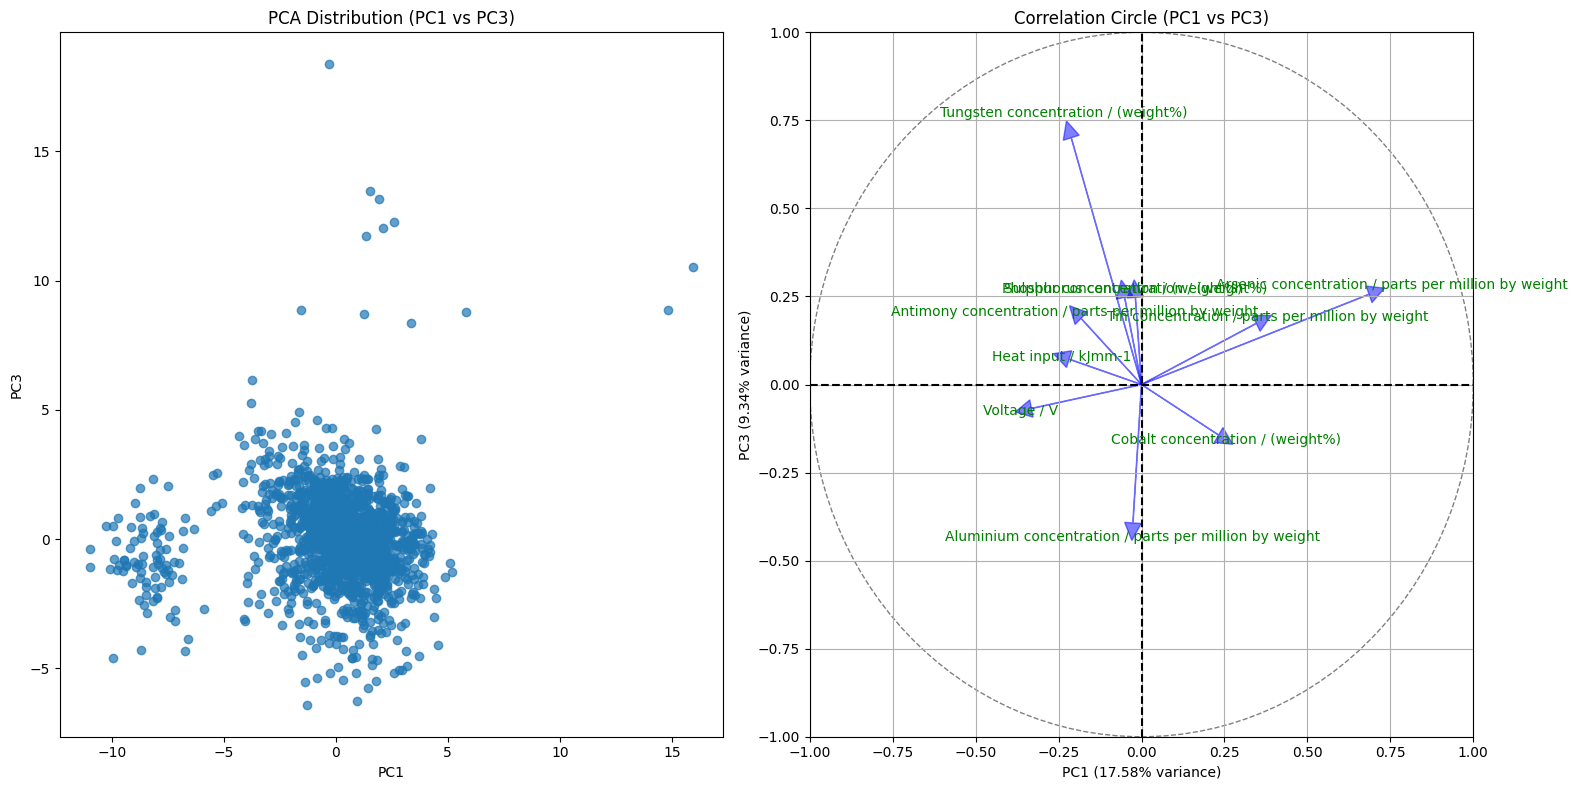

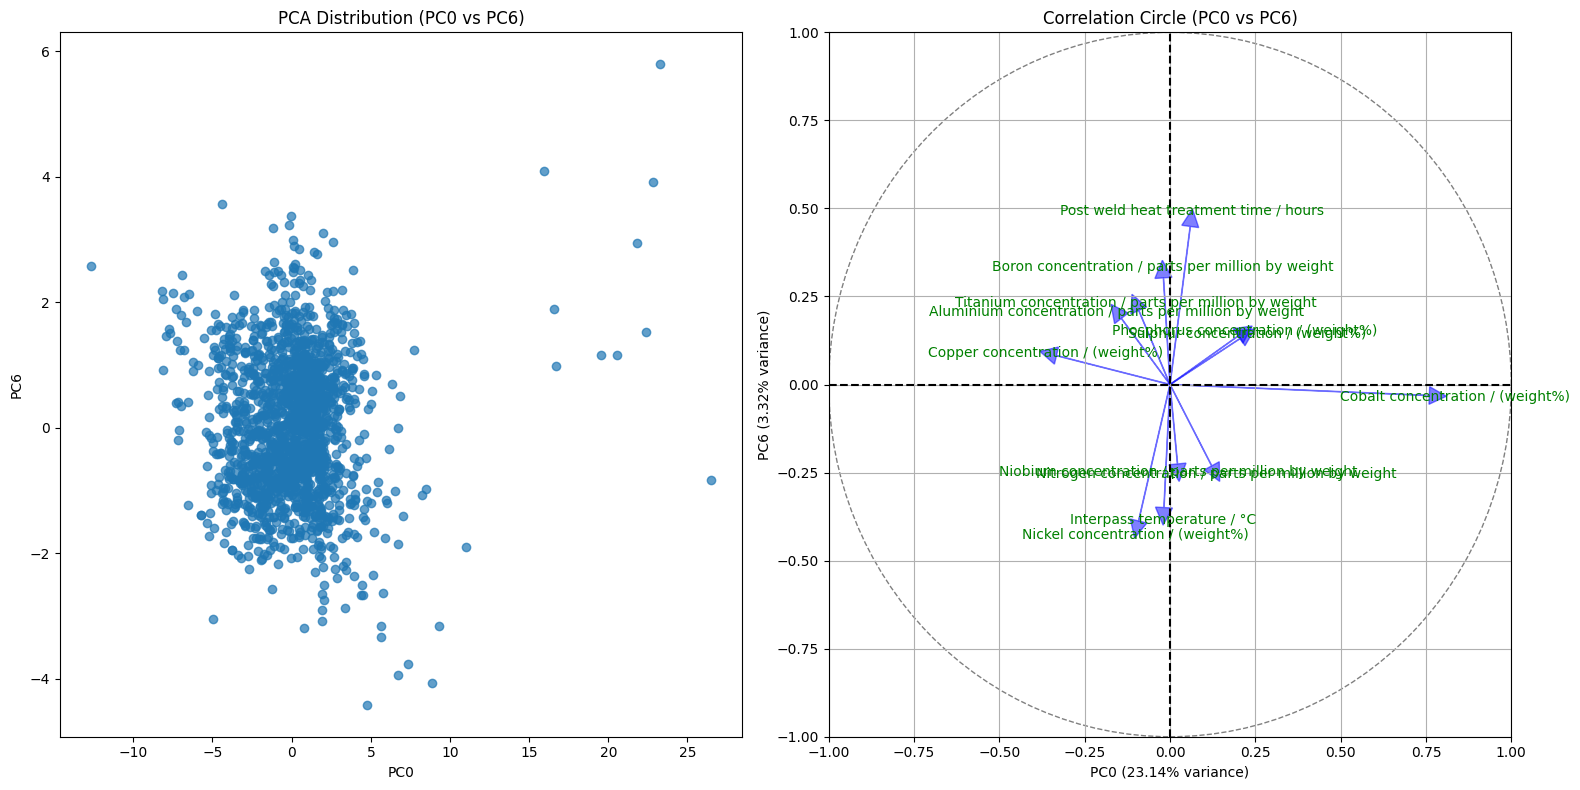

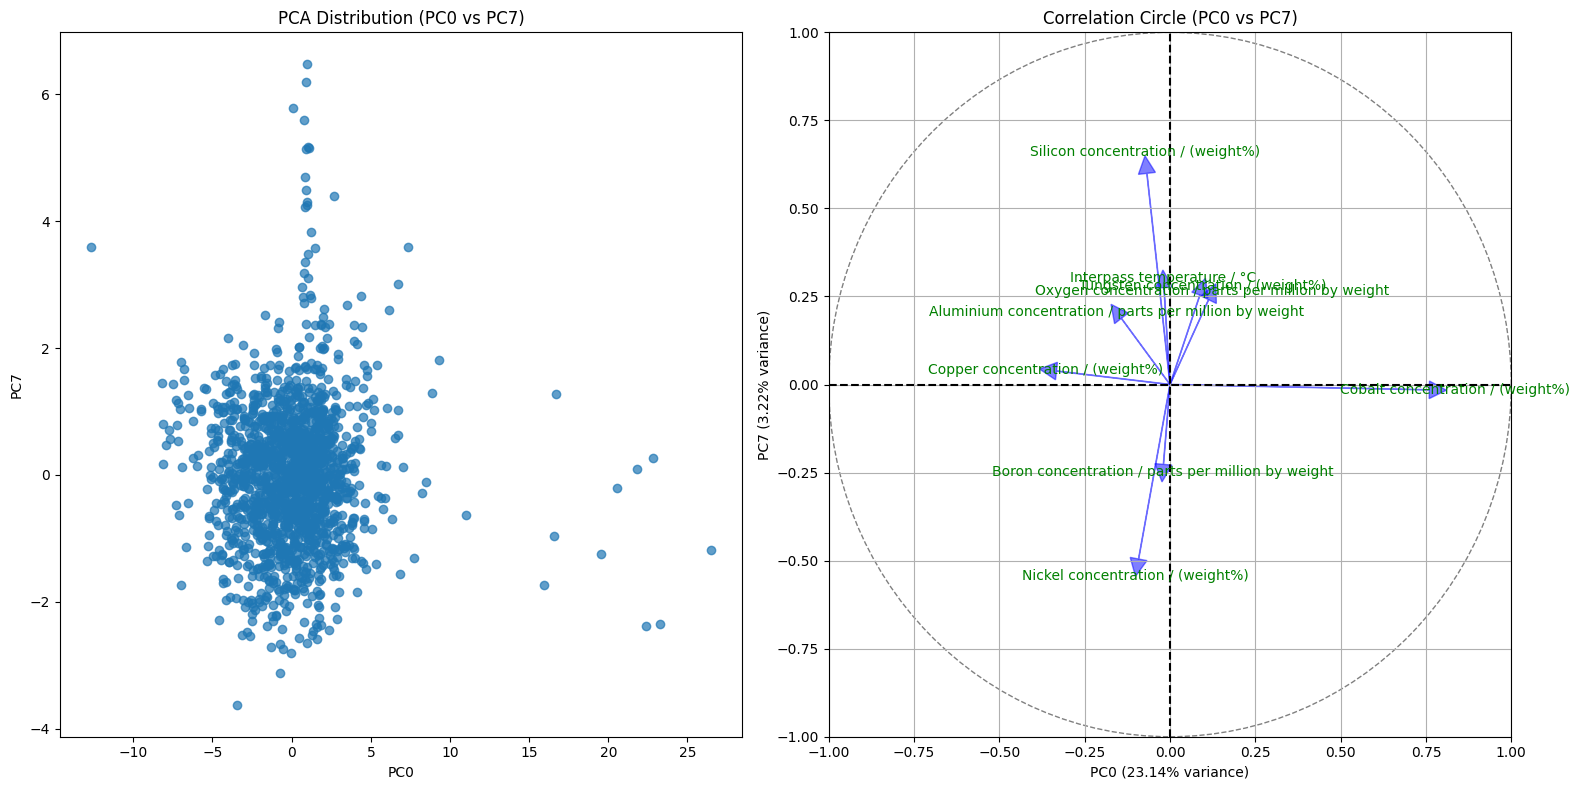

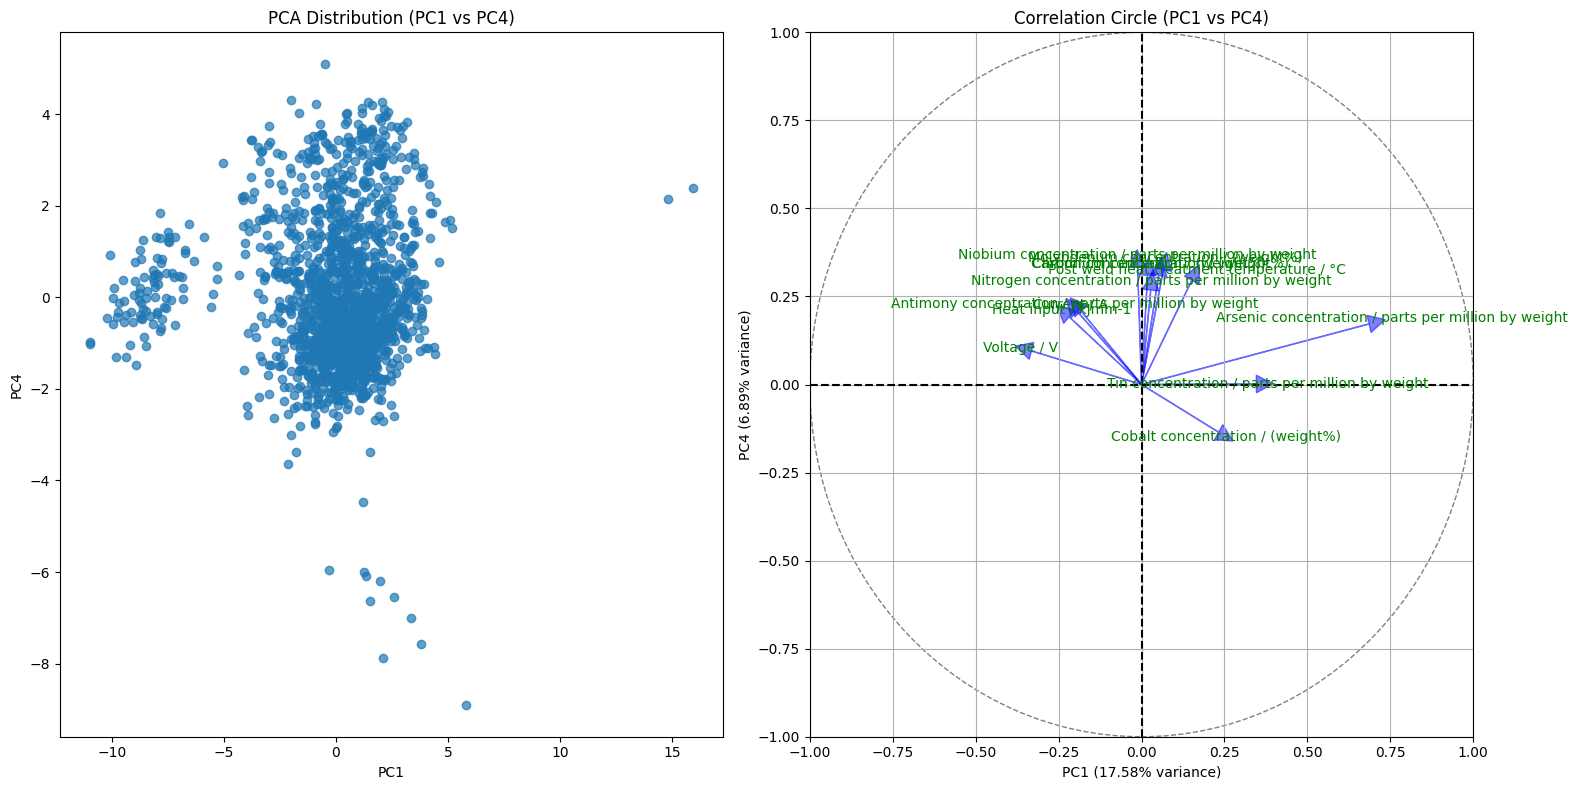

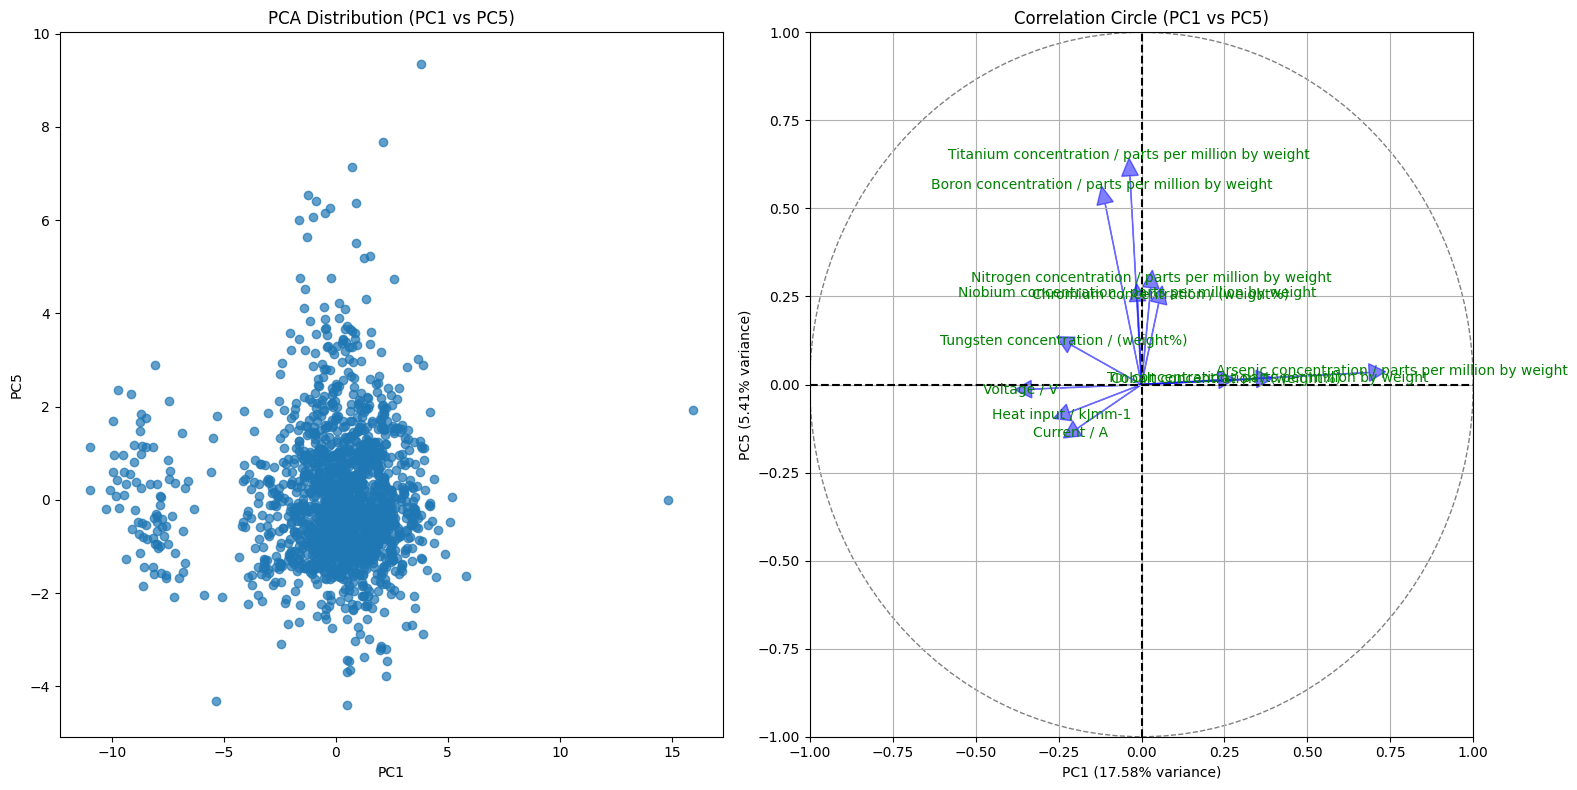

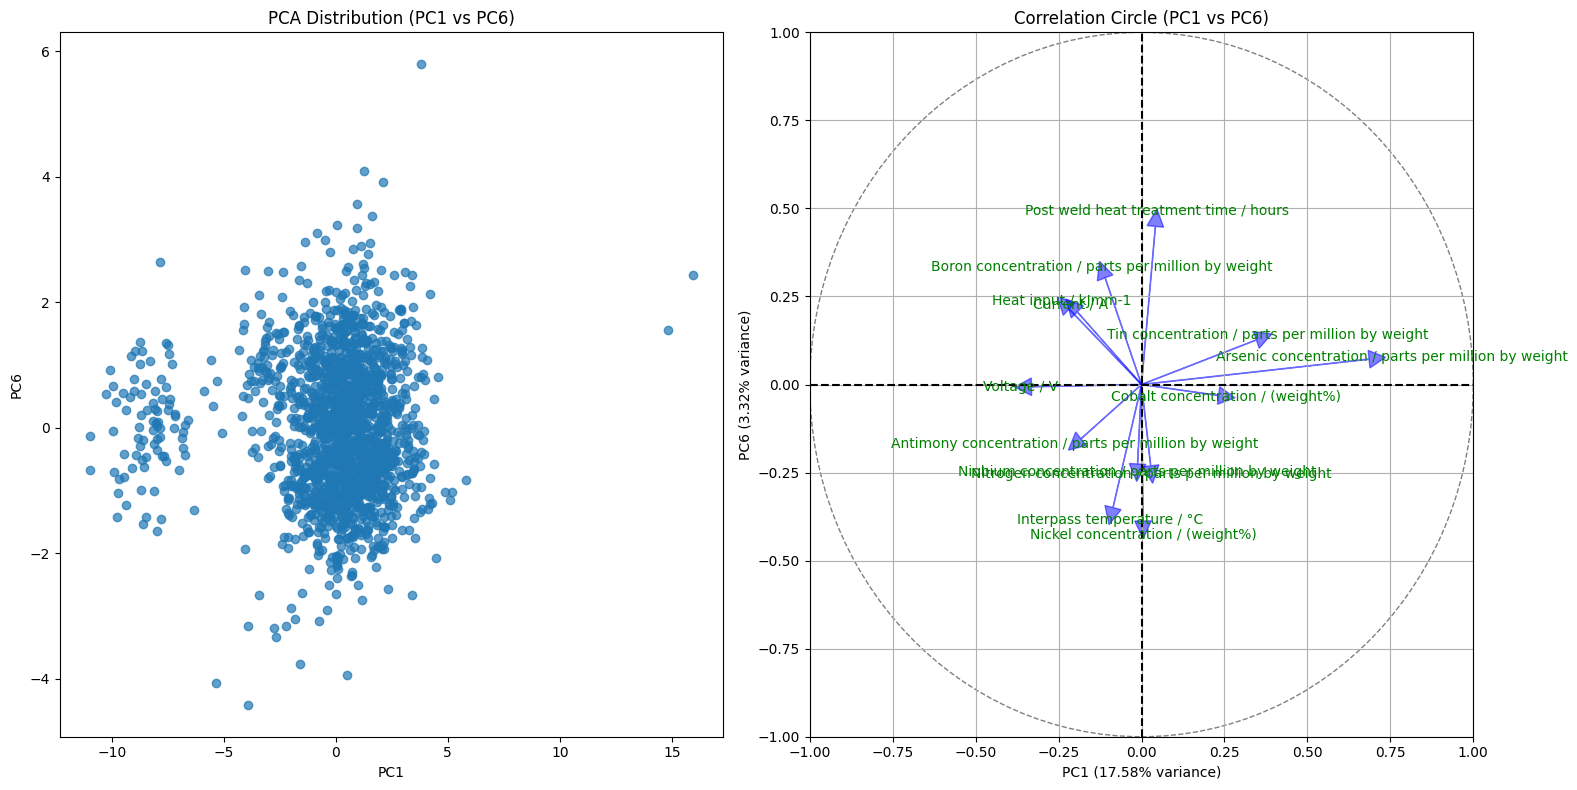

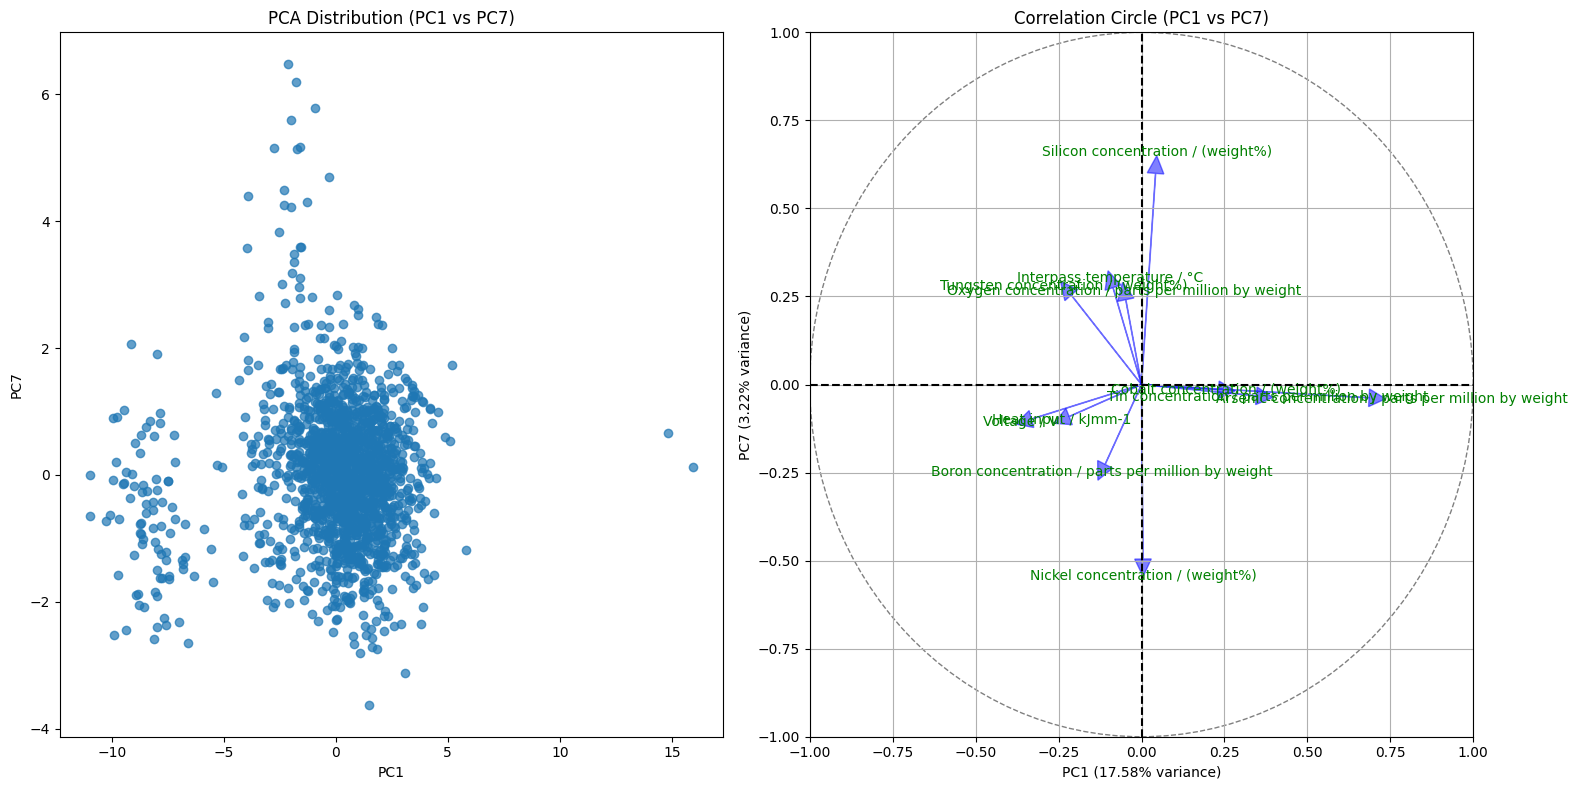

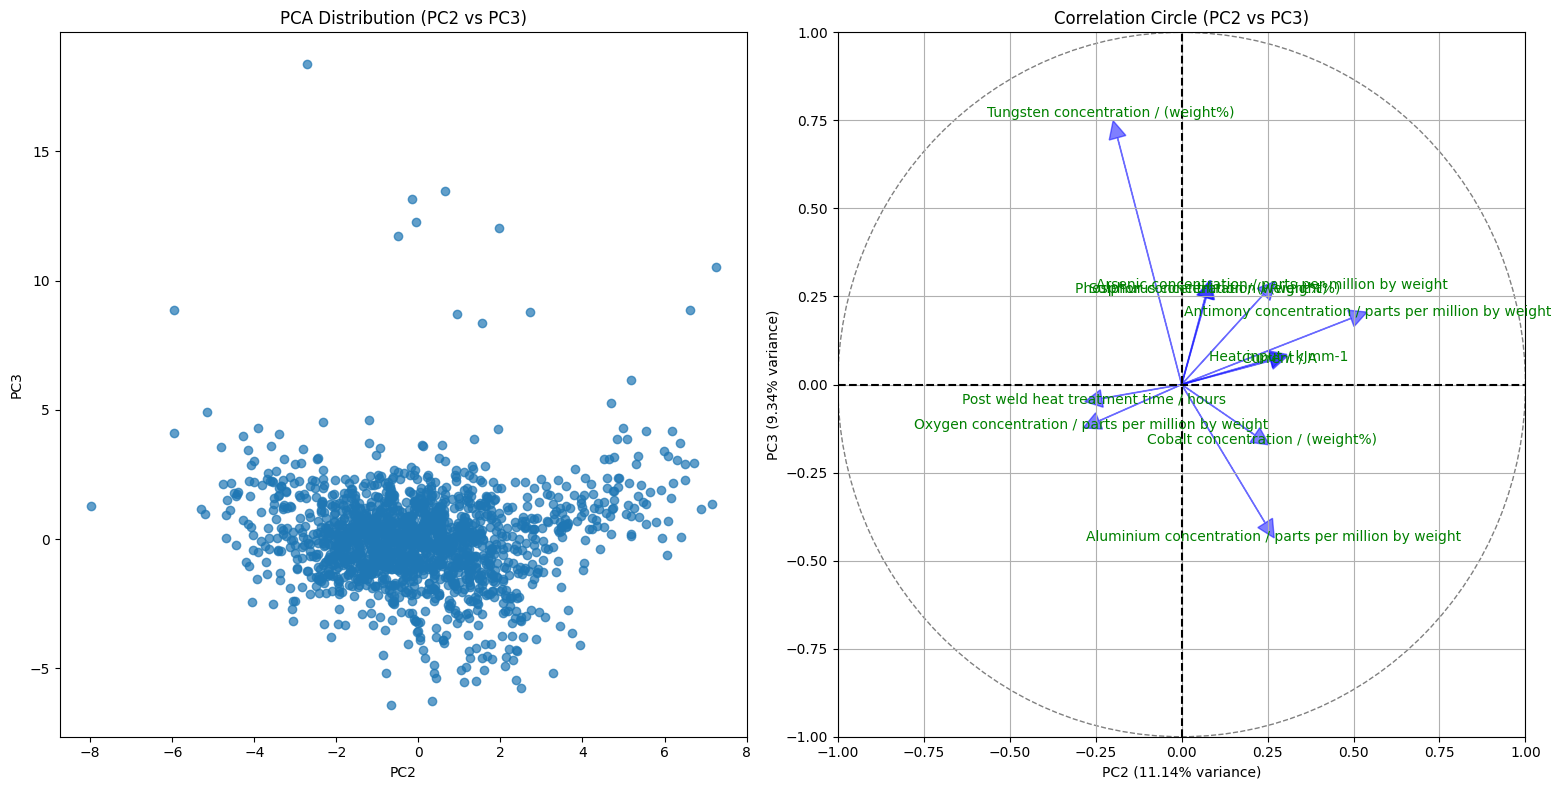

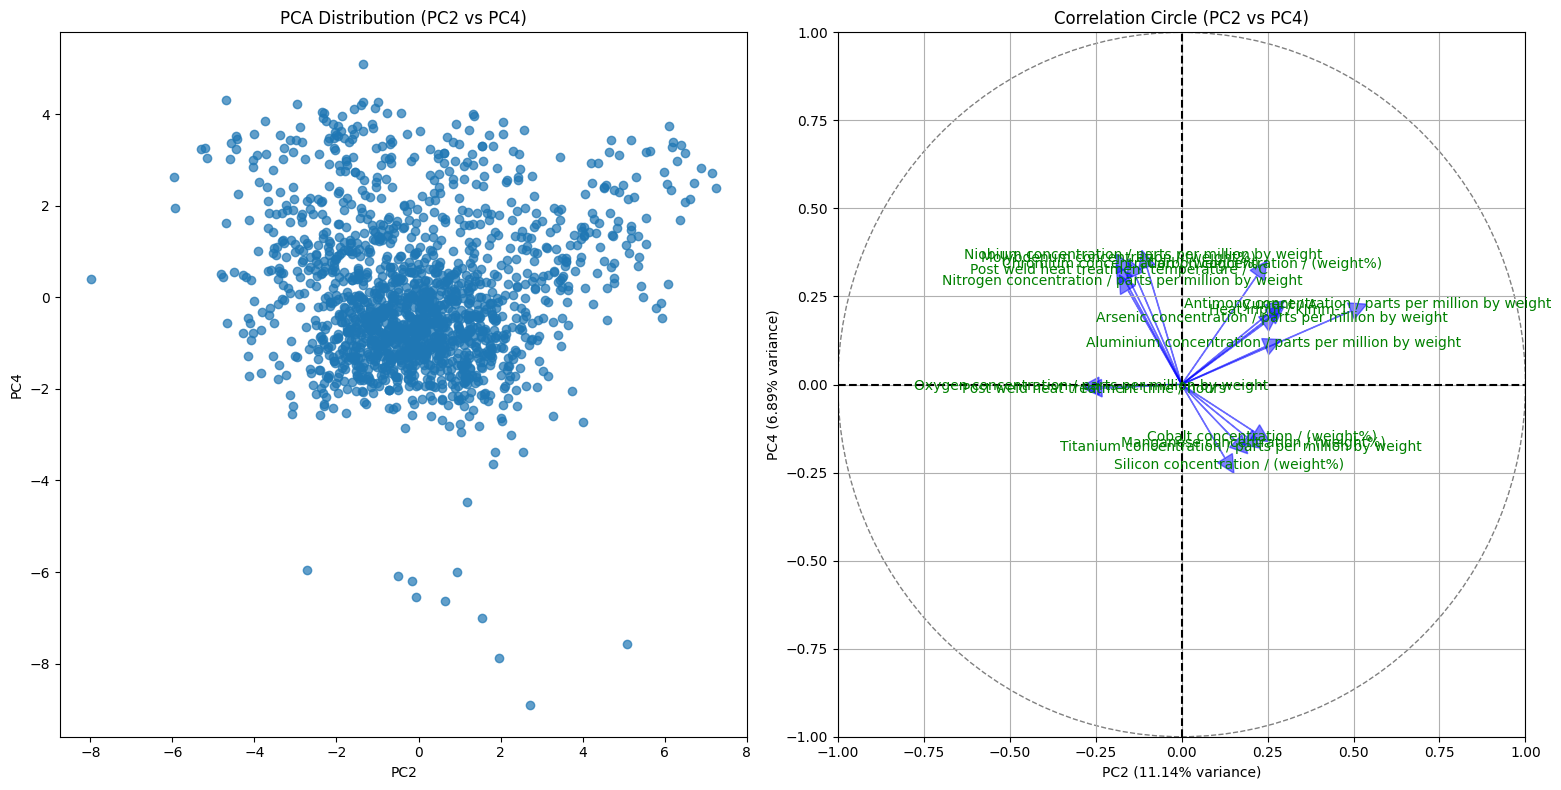

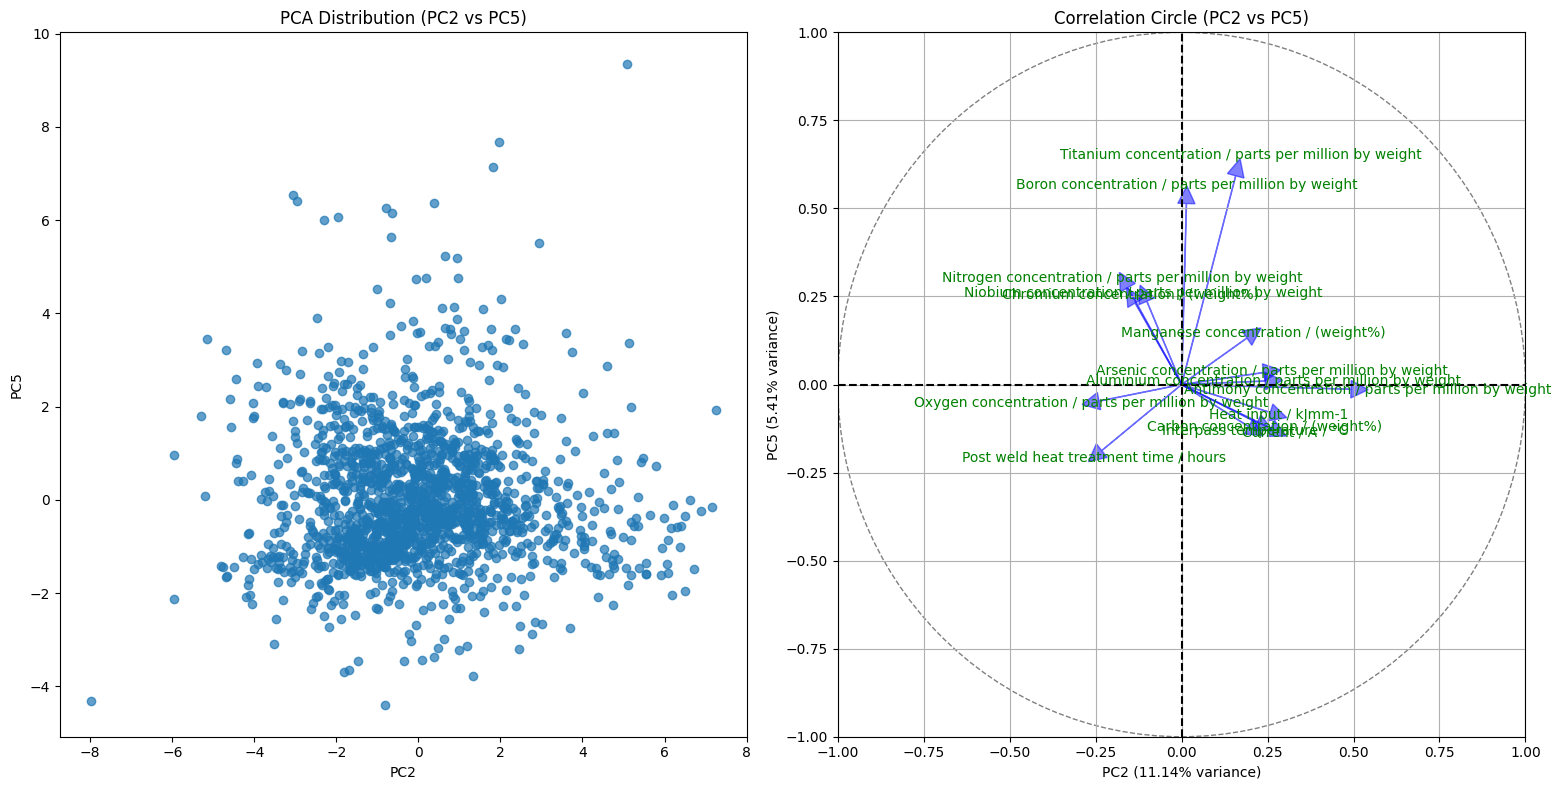

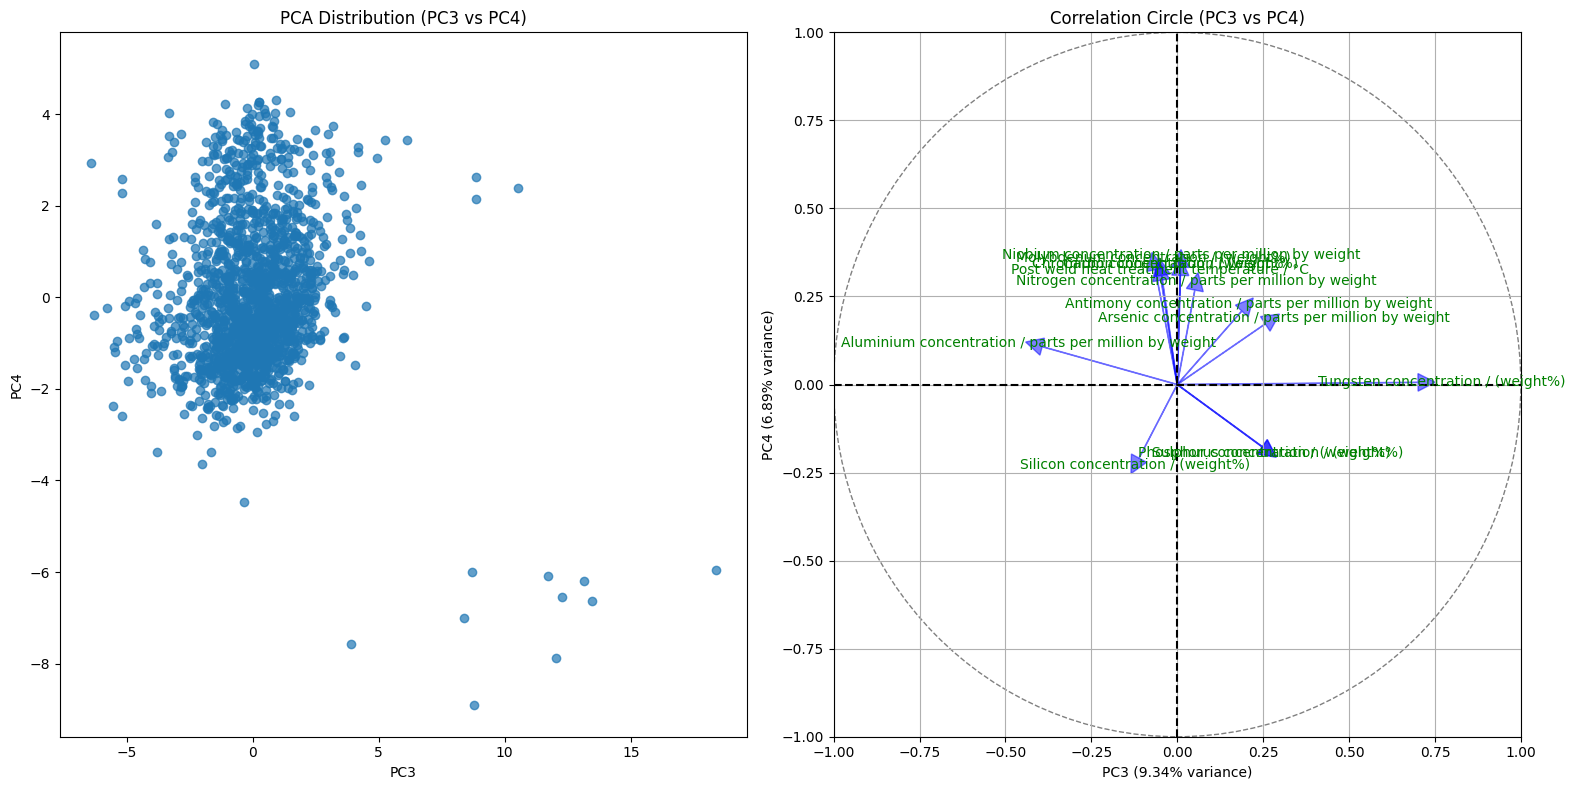

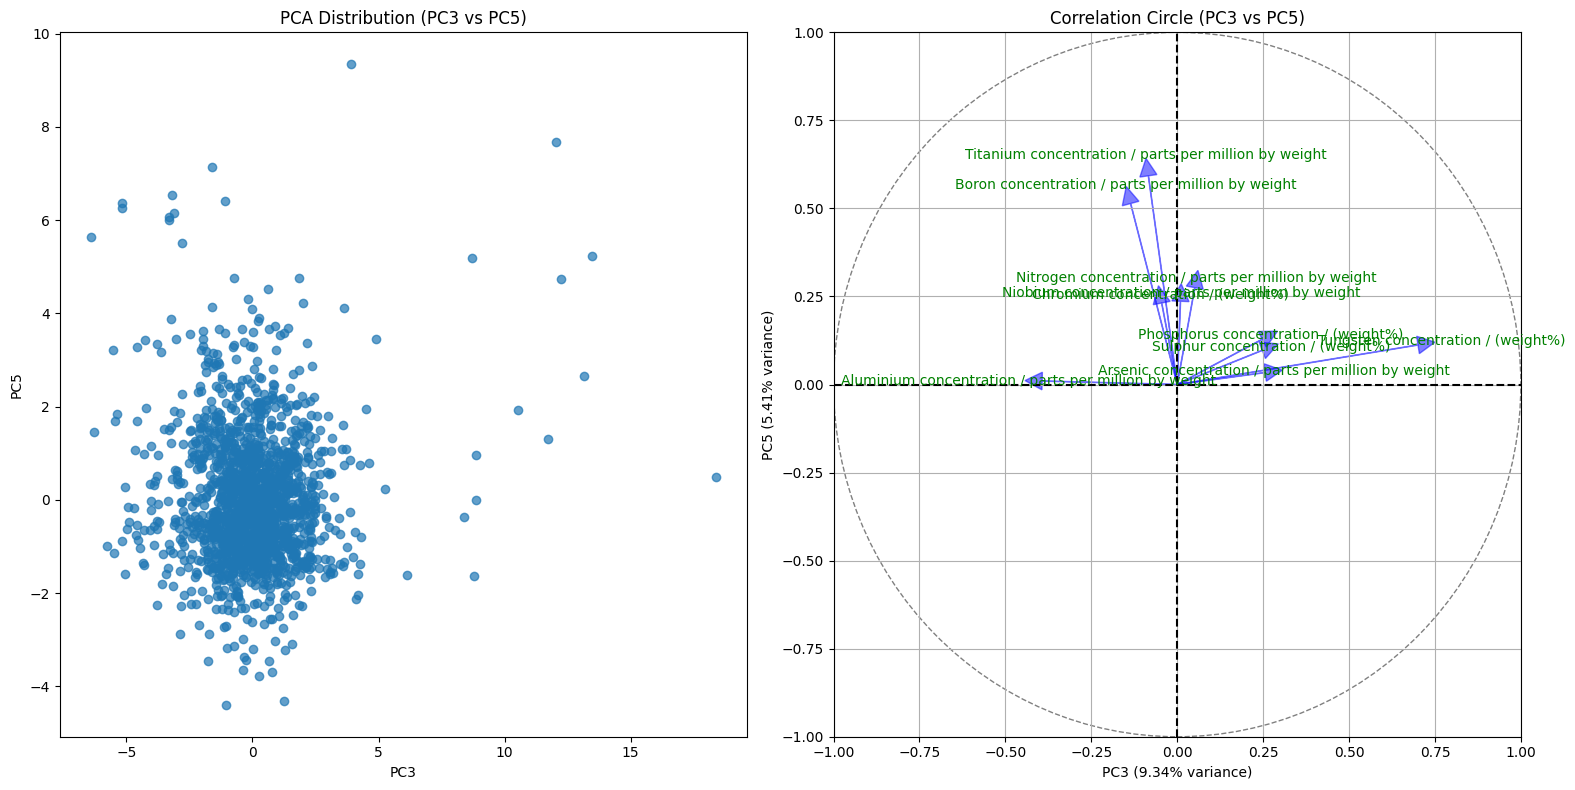

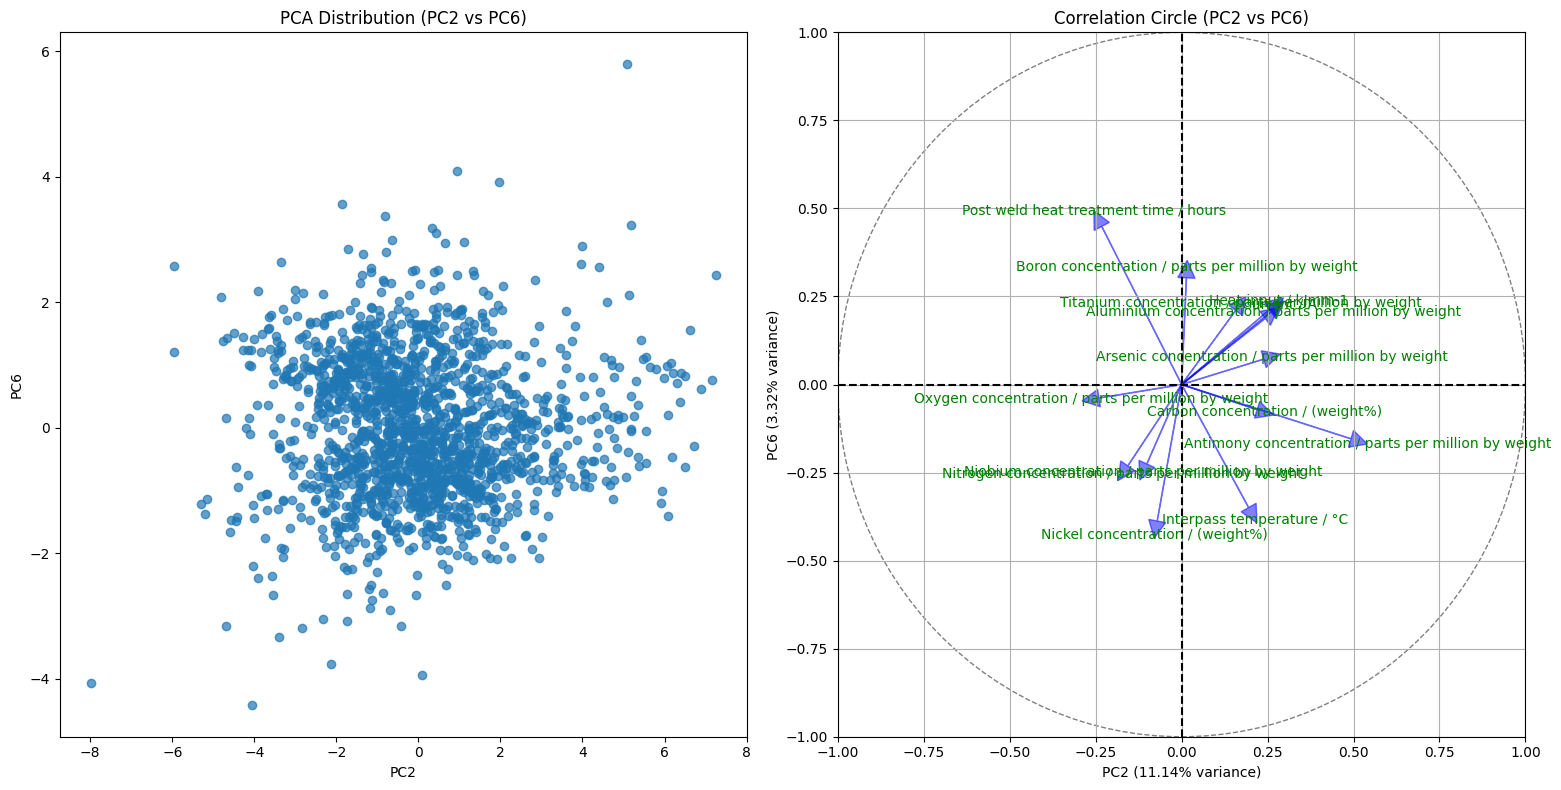

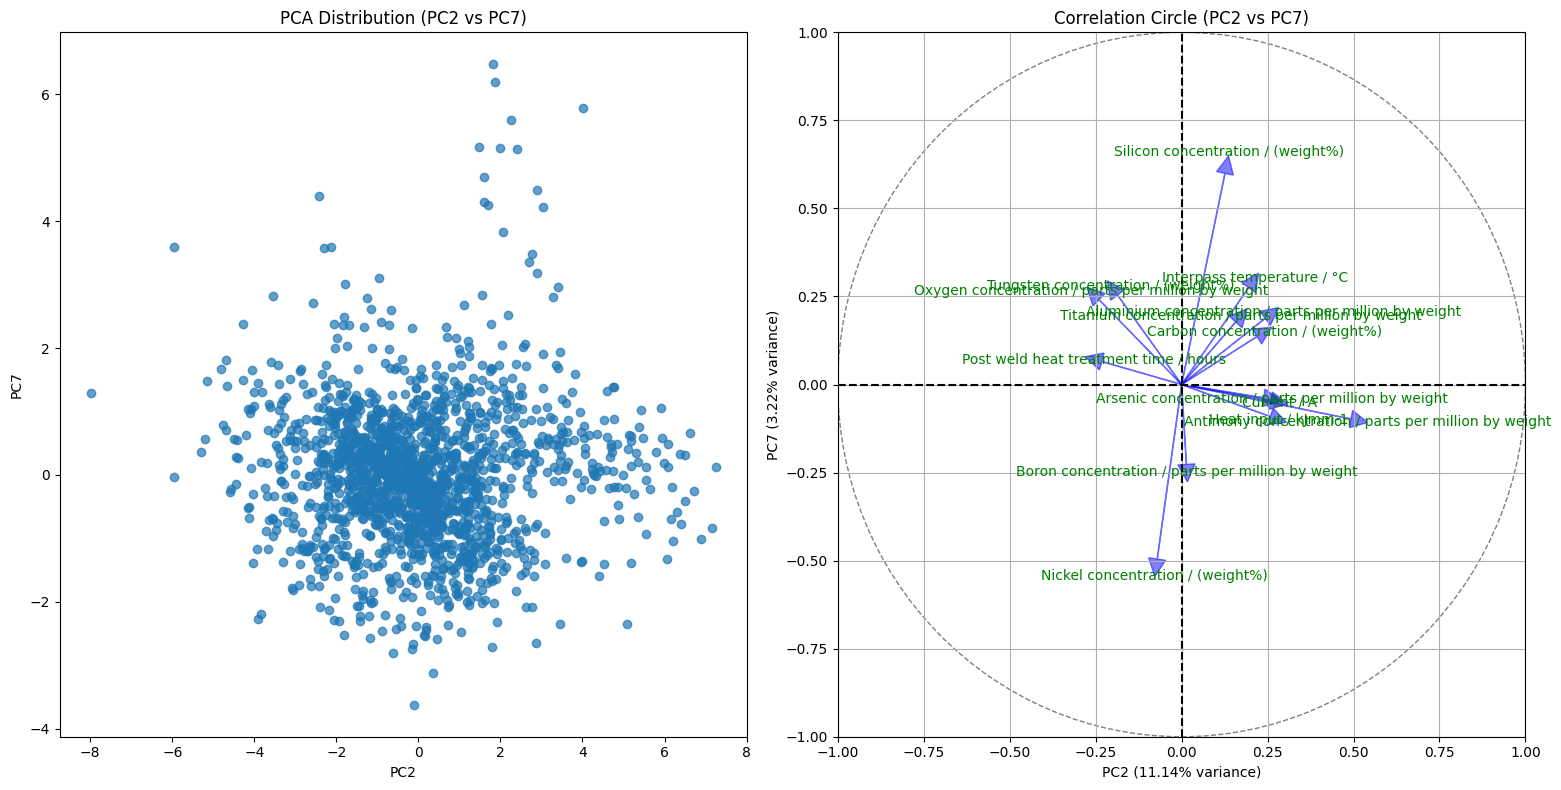

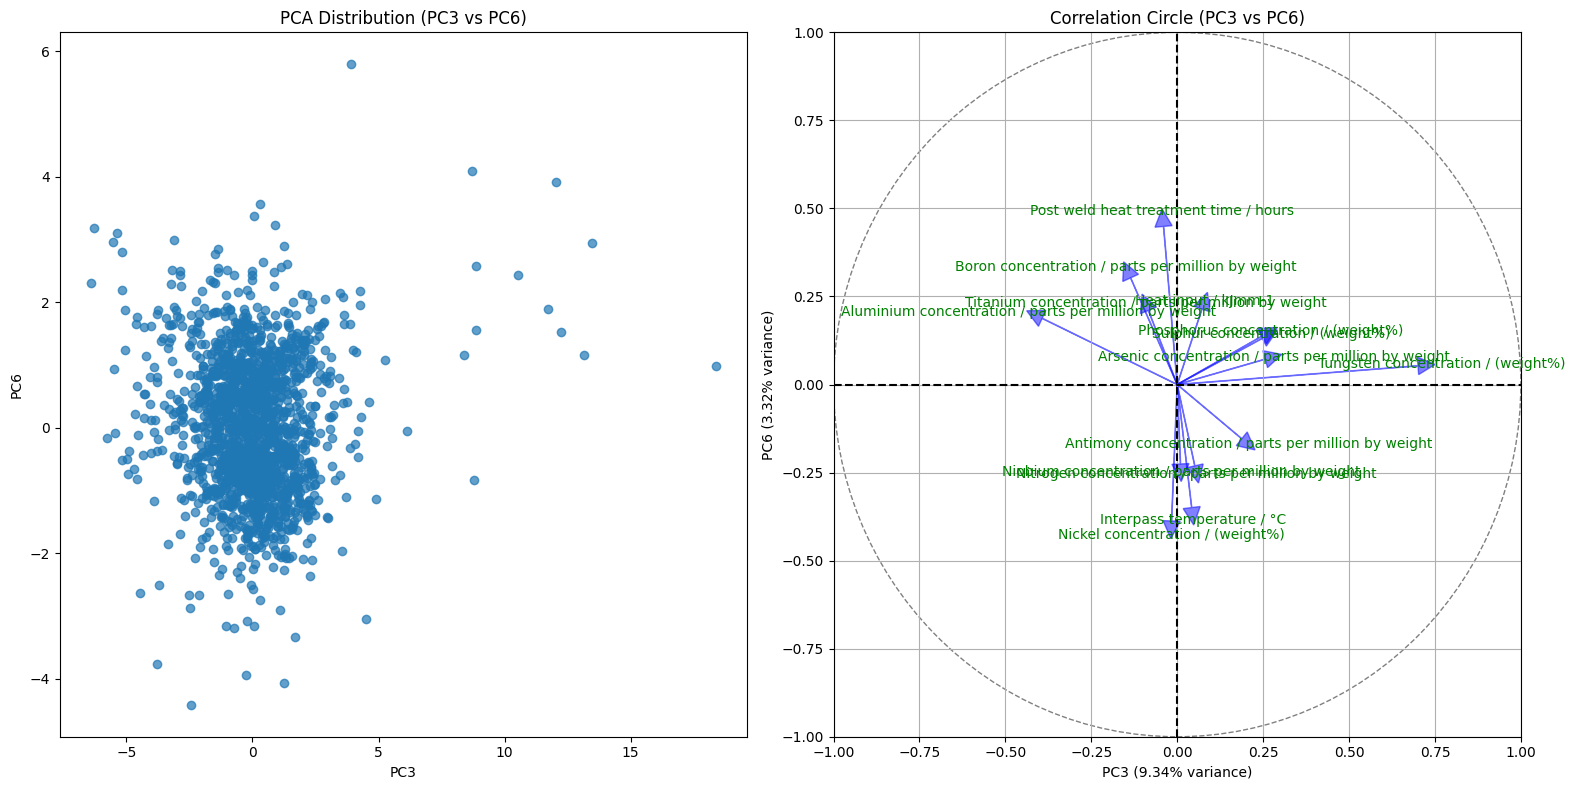

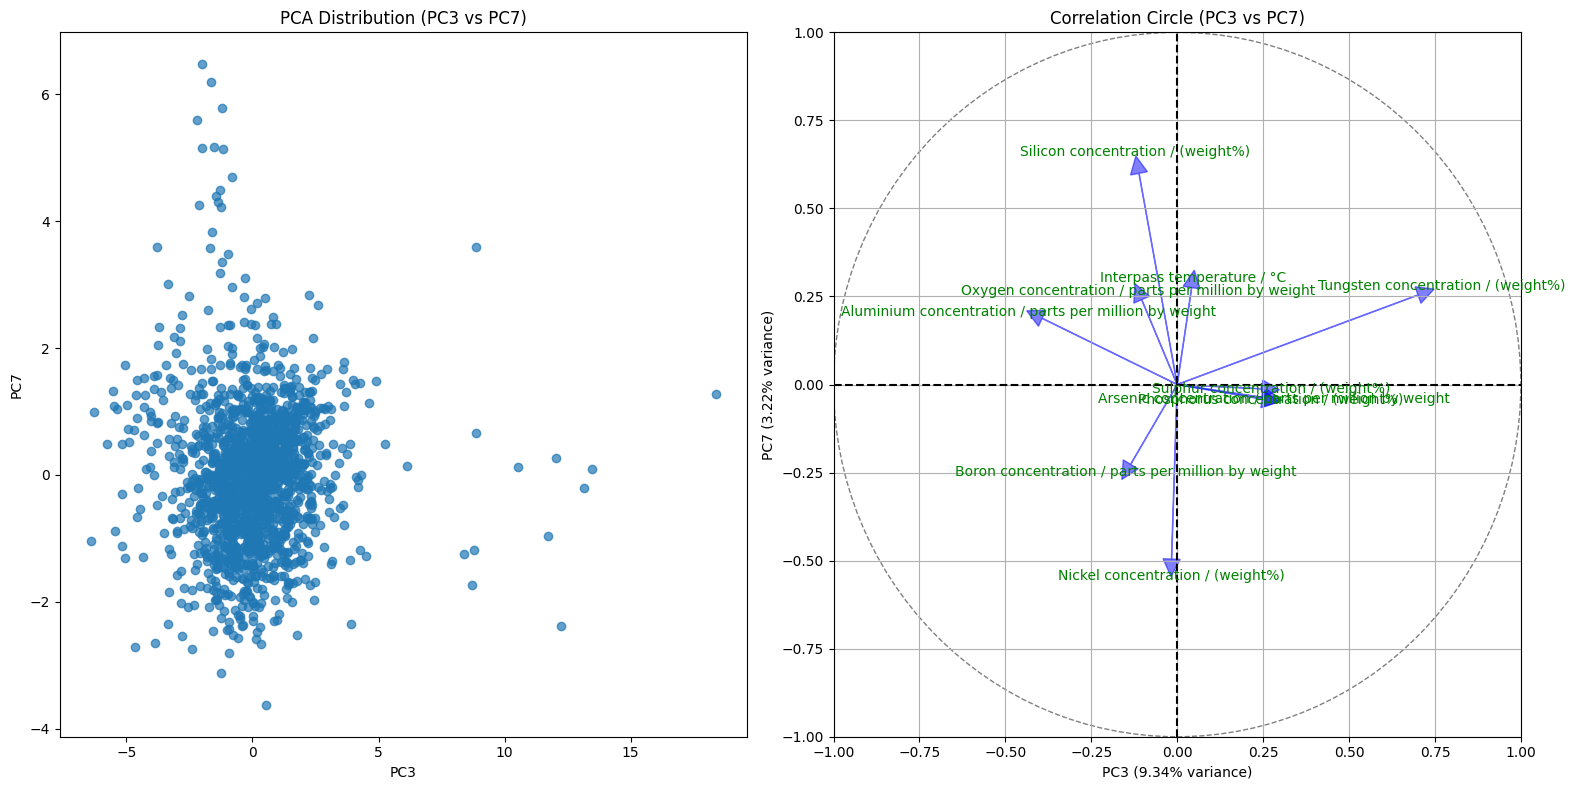

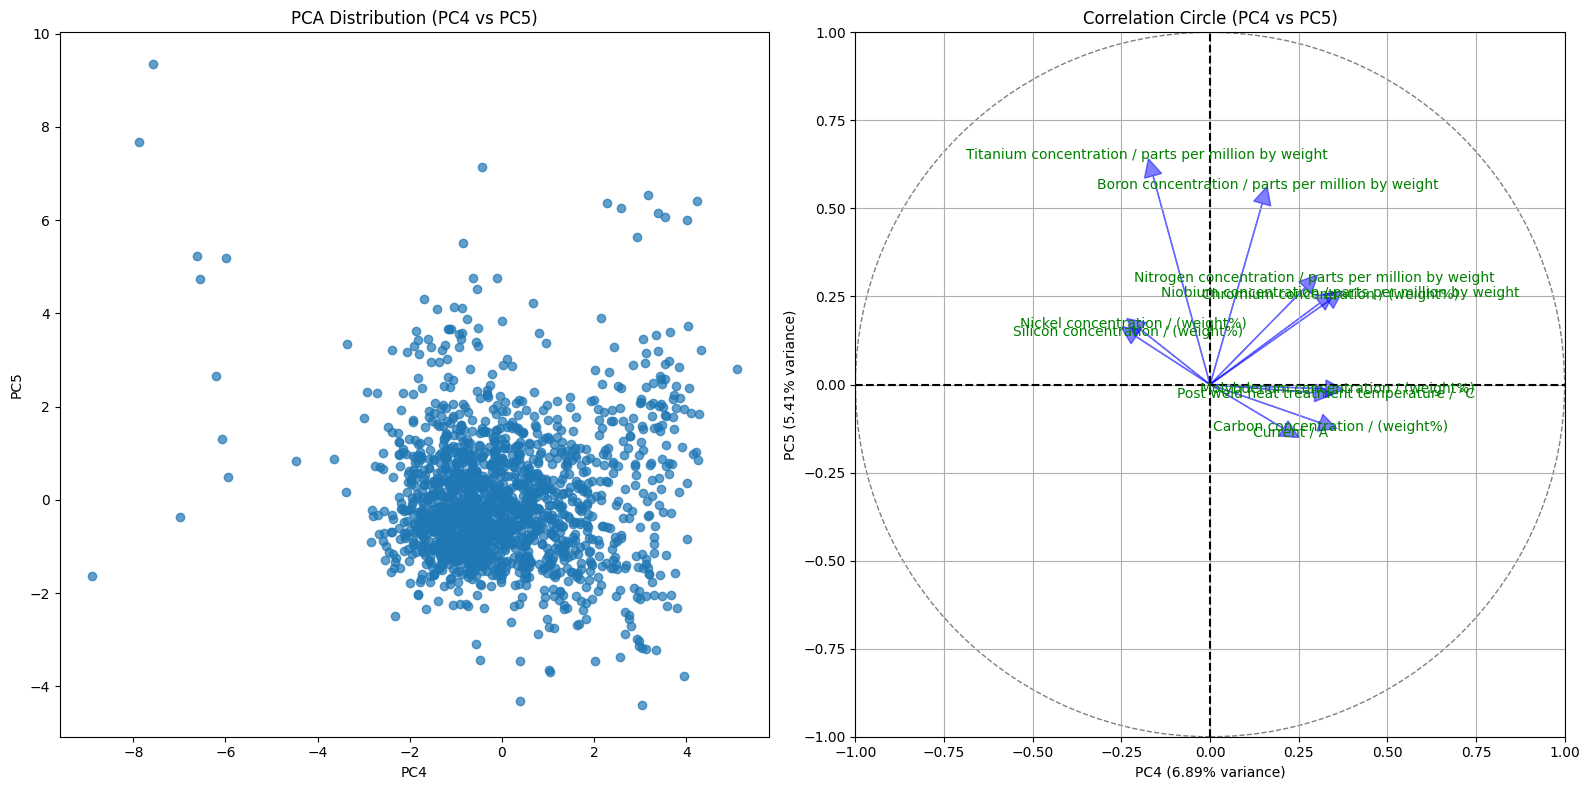

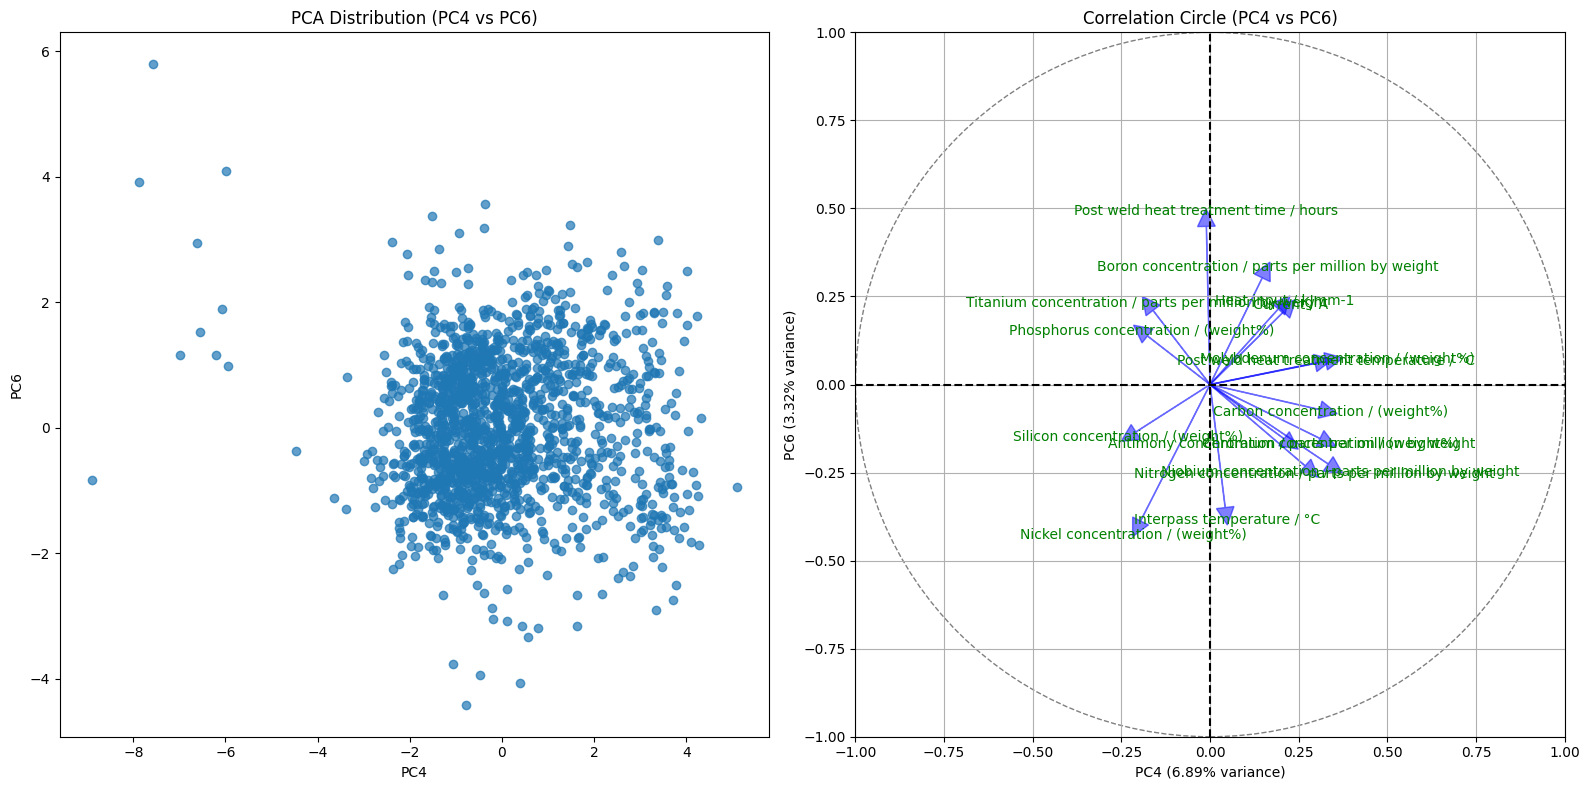

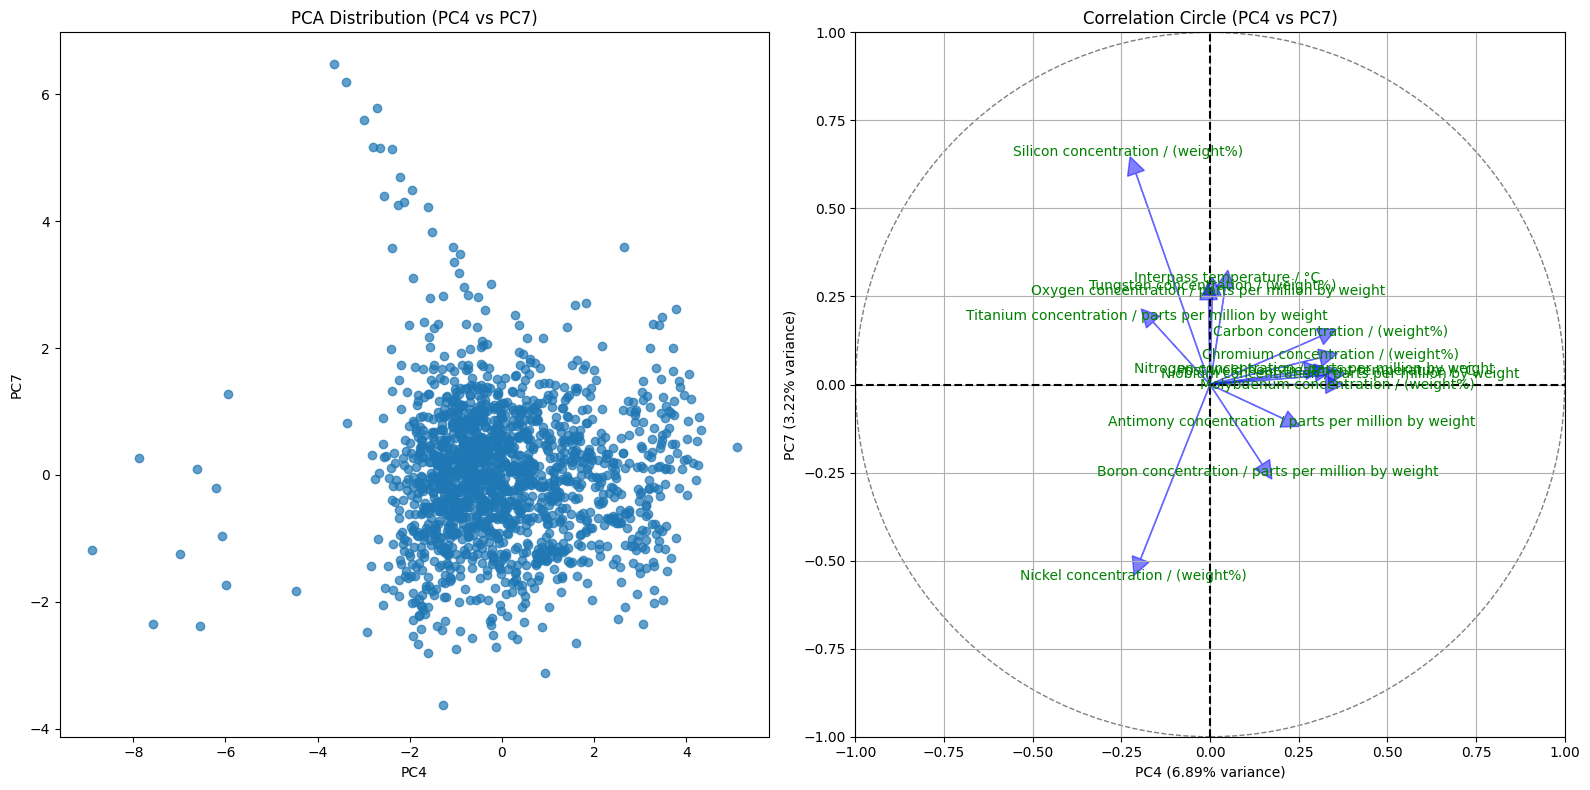

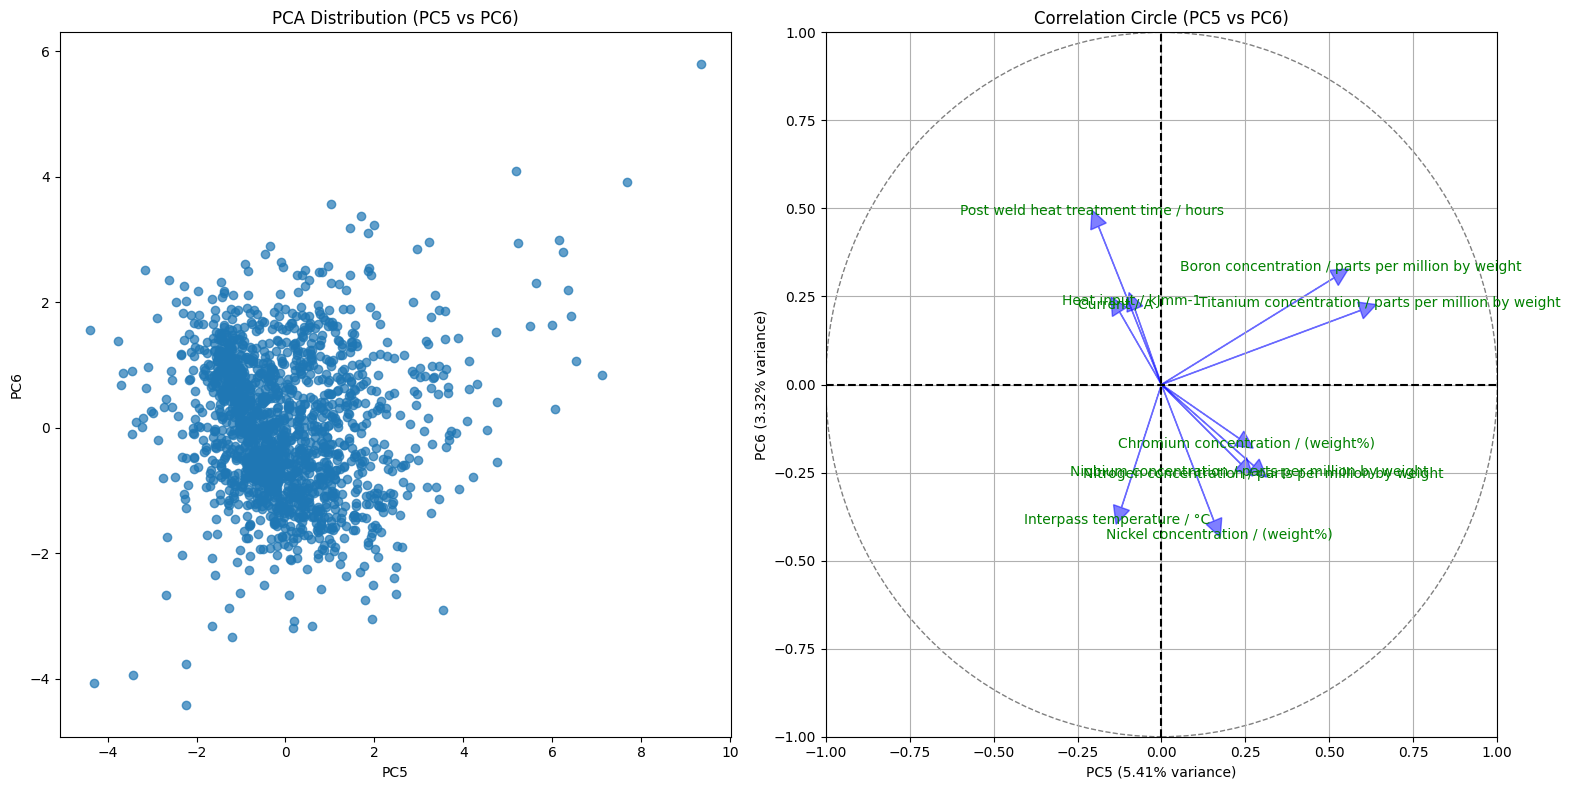

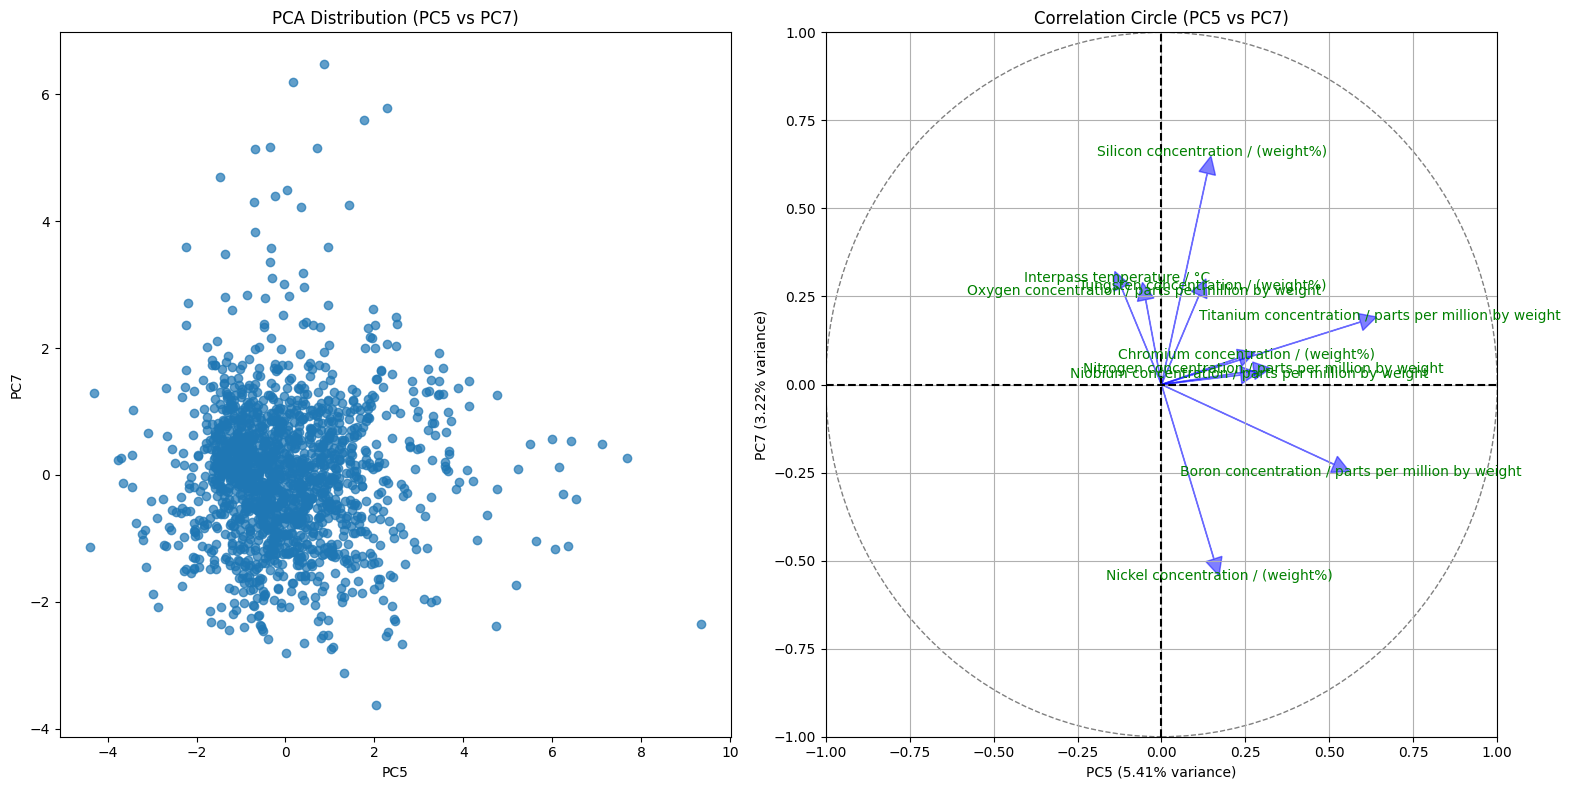

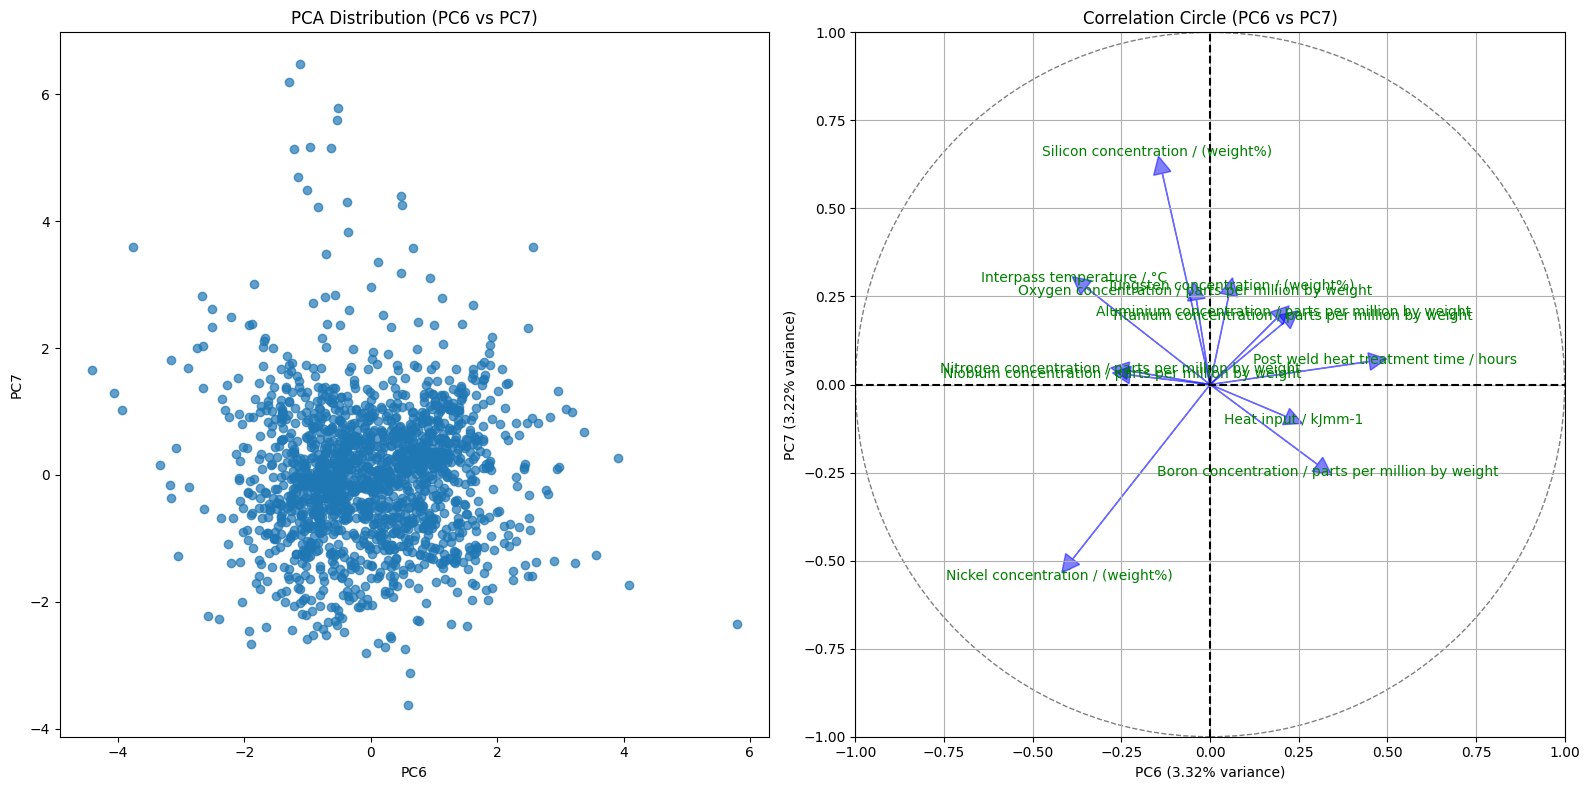

In [9]:
plot_PCA(pca, principal_components, nb_relevant_features, pca_datset.columns)

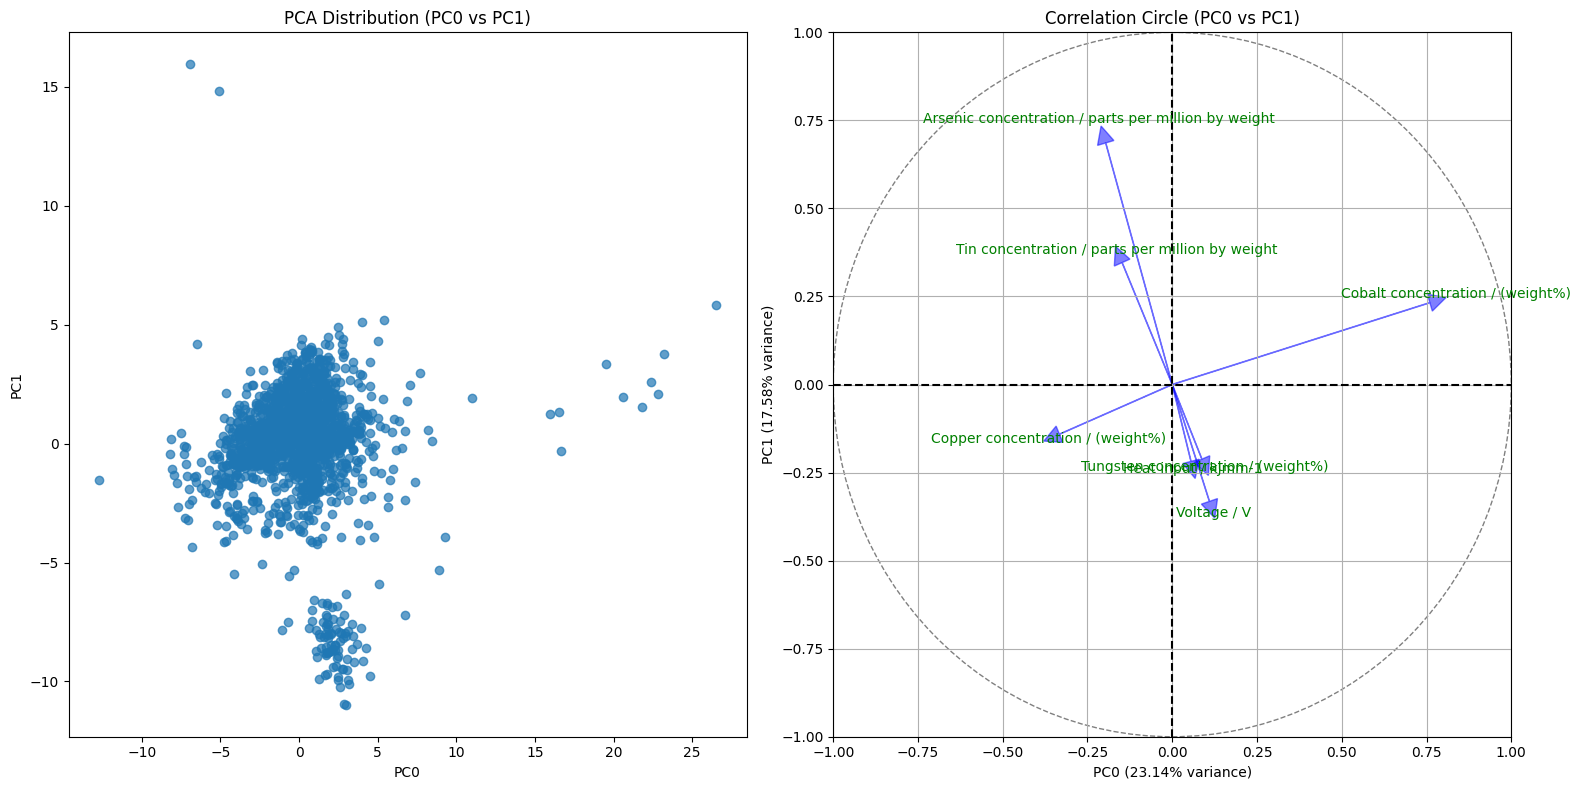

In [10]:
plot_PCA(pca, principal_components, 2, pca_datset.columns)

The features most correlated with the first principal componants are the ones most resembling a normal distribution and for which no value was imputed 

# Semi supervised learning

In [7]:
from models.semi_supervised import *
from models.evaluation import *

c:\Users\matte\Documents\Cours\3A\Mention\ApprAuto\Projet\apprAuto-projet\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [22]:
Db_complete = preprocess_semisupervised(Db, OutputColumn.yield_strength, Models.regressions)

In [10]:
evaluation_semi(Db, OutputColumn.yield_strength, Models.randomforest)

{'MSE': np.float64(1785.826116760136),
 'R²': 0.7618637458235826,
 'Bias': np.float64(0.0970486246582795),
 'Variance': np.float64(4236.713098425663)}